                   State  1988  1989  1990  1991  1992  1993  1994  1995  \
0                Alabama    52    46    47    43    61    76    70    59   
1                 Alaska    10     7     7    13     8     8    16     9   
2                Arizona    18    23    36    21    26    48    47    36   
3               Arkansas    24    18    22    28    38    28    41    48   
4             California   163   159   197   230   274   345   397   404   
5               Colorado    20    17    25    17    17    34    30    44   
6            Connecticut    14    14    22    18    31    30    36    52   
7               Delaware     3     3     0     6     6     5    12     9   
8   District of Columbia     5     4     8     6    12    13     7    10   
9                Florida    61    73    82   103   106    94   114   139   
10               Georgia    59    62    55    66    73    73    90   106   
11                Hawaii     1     7     4     3    10     4    10    12   
12          

     State  Year    Donor Type  Transplants  Population  Transplant Rate
0  Alabama  1988  Living Donor           60    4023.844         1.491111
1  Alabama  1989  Living Donor           61    4030.222         1.513564
2  Alabama  1990  Living Donor           62    4048.508         1.531428
3  Alabama  1991  Living Donor           63    4091.025         1.539956
4  Alabama  1992  Living Donor           74    4139.269         1.787755
States missing from income file: set()
Before dropping NaNs: (1786, 10)
After dropping NaNs: (1739, 10)
FILE
          State    Donor Type  Year  Transplants  Population  Transplant Rate  \
0       Alabama  Living Donor  1988           60    4023.844         1.491111   
1       Alabama  Living Donor  1989           61    4030.222         1.513564   
2       Alabama  Living Donor  1990           62    4048.508         1.531428   
3       Alabama  Living Donor  1991           63    4091.025         1.539956   
4       Alabama  Living Donor  1992           74

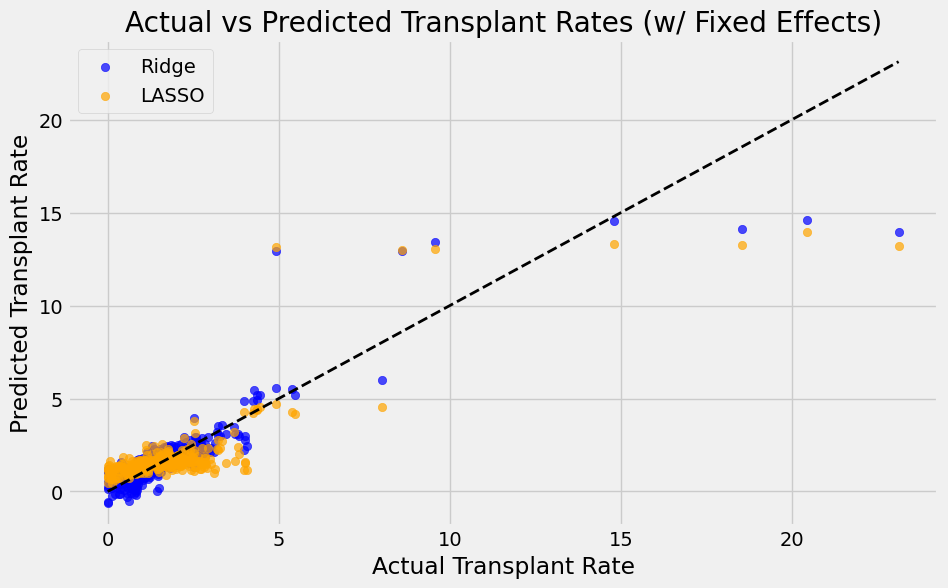

                            OLS Regression Results                            
Dep. Variable:        Transplant Rate   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1070.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           2.74e-57
Time:                        00:37:30   Log-Likelihood:                -2109.3
No. Observations:                1739   AIC:                             4391.
Df Residuals:                    1653   BIC:                             4860.
Df Model:                          85                                         
Covariance Type:              cluster                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 39
  warnings.warn('covariance of constraints does not have full '


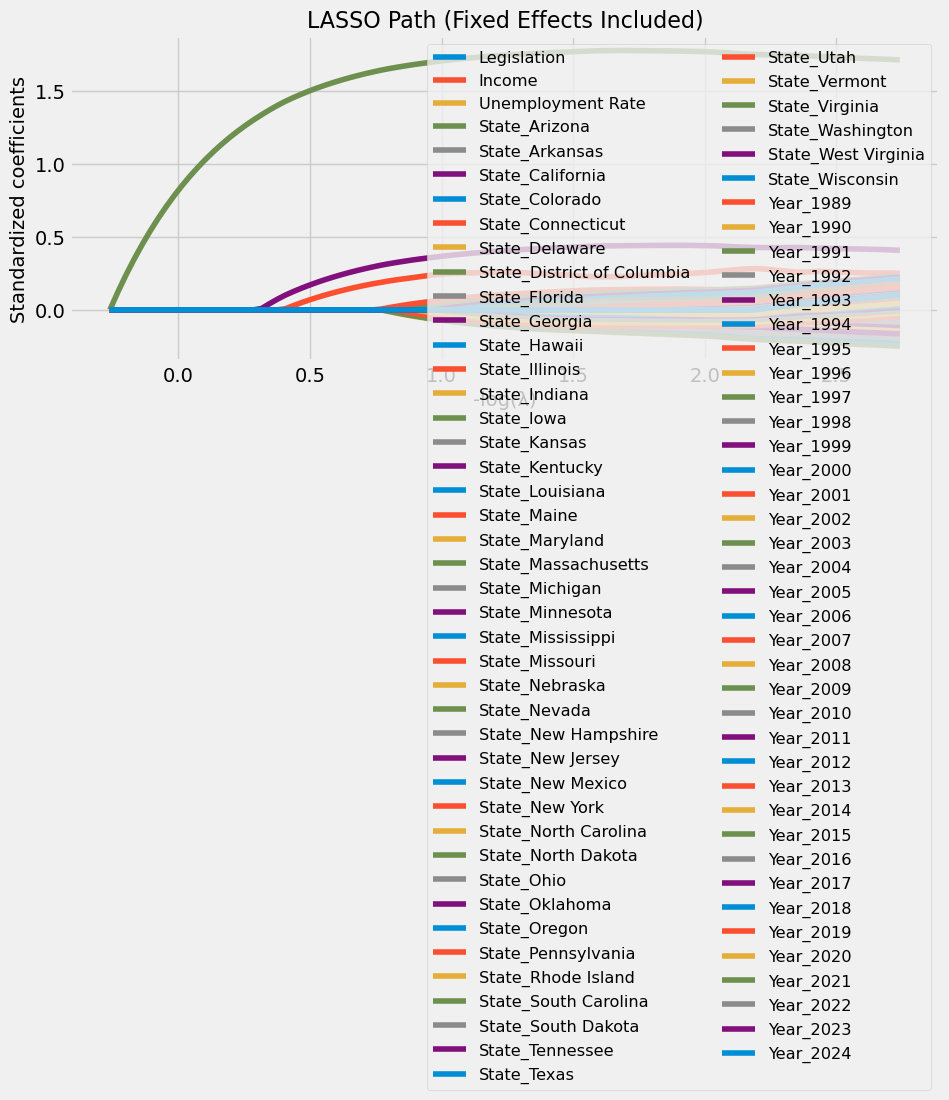

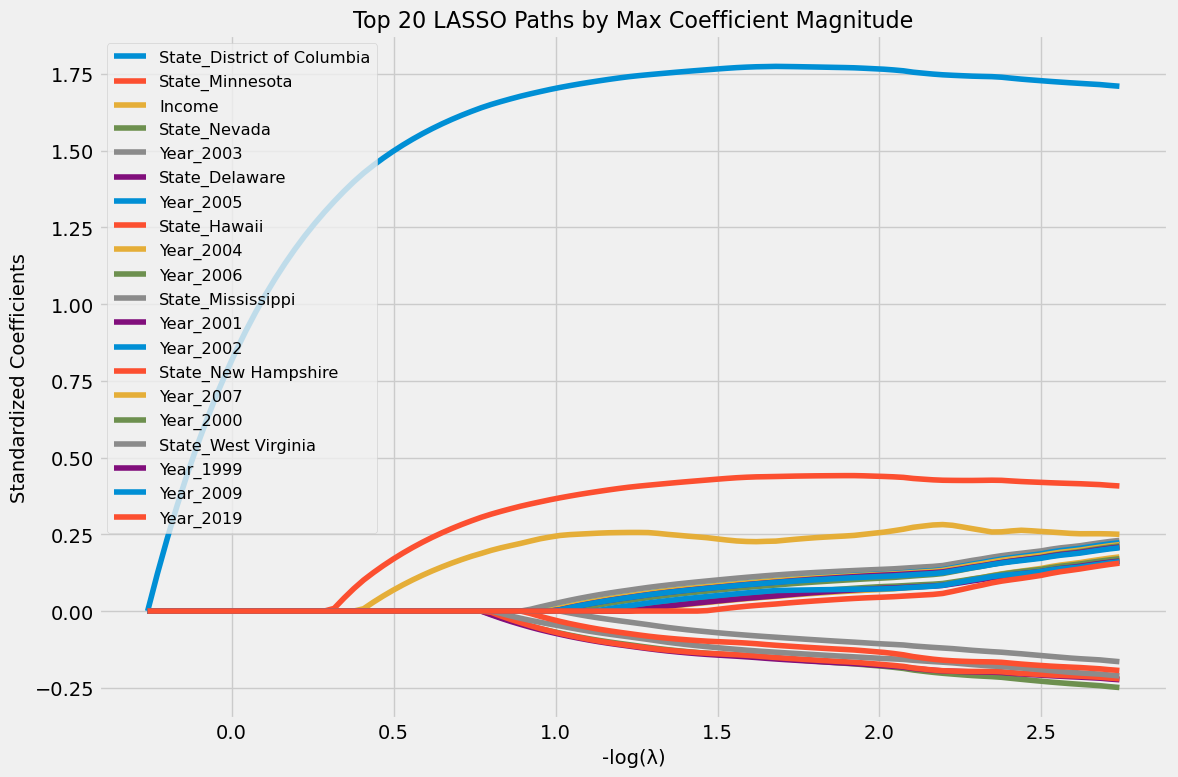

SUMMARY STATISTICS
       Transplant Rate         Income  Unemployment Rate  Legislation
count      1739.000000    1739.000000        1739.000000  1739.000000
mean          1.831641   71463.225992           5.305865     0.432432
std           2.195629   12954.129758           1.902107     0.495556
min           0.000000   41070.000000           1.800000     0.000000
25%           0.841844   62045.000000           3.900000     0.000000
50%           1.474714   69990.000000           5.000000     0.000000
75%           2.173946   79630.000000           6.300000     1.000000
max          23.121387  115800.000000          13.500000     1.000000


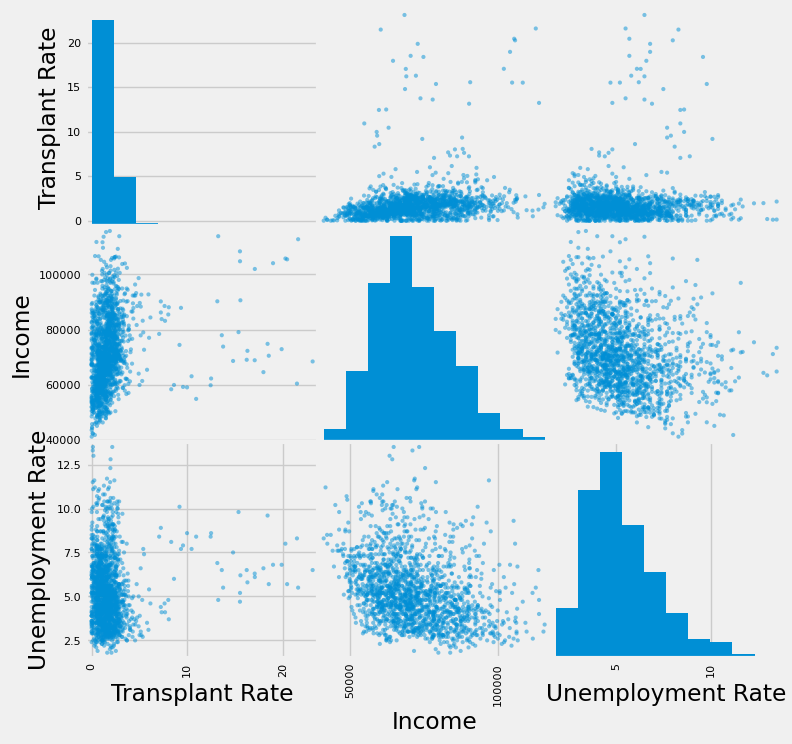

            Transplant Rate                                               \
                      count      mean       std  min       25%       50%   
Legislation                                                                
0.0                   987.0  1.869797  2.771577  0.0  0.772107  1.286758   
1.0                   752.0  1.781562  1.032819  0.0  1.067997  1.722807   

                                 Income                ...                     \
                  75%        max  count          mean  ...      75%       max   
Legislation                                            ...                      
0.0          1.968101  23.121387  987.0  68466.727457  ...  75090.0  113900.0   
1.0          2.373740   7.676384  752.0  75396.130319  ...  84107.5  115800.0   

            Unemployment Rate                                                
                        count      mean       std  min  25%  50%  75%   max  
Legislation                                              

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 39
  warnings.warn('covariance of constraints does not have full '


In [35]:

    
    !pip install -q xgboost
    !pip install -q dowhy
    !pip install -q lightgbm


  
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import Ridge, Lasso, lasso_path, RidgeCV, LassoCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import r2_score, mean_absolute_error
    from sklearn.model_selection import GridSearchCV, KFold
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    import statsmodels.api as sm
    from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report




    
    
    import xgboost as xgb
    from sklearn.model_selection import cross_val_predict

    
    statecount = pd.read_csv('Organ Counts by State.csv')
    print(statecount)
    
 

    # View the first few rows
    #print(df_long.head())

    
    # For a CSV file
    df = pd.read_csv('AnonUnrelatedDonors.csv')
    
    print(df)
    #living_donors = df[df['Donor Type'] == 'Living Donor']
    #mean_transplants = living_donors['Transplants'].mean()
    #std_transplants = living_donors['Transplants'].std()
    
    
    #df = df[df['Donor Type'] == 'Living Donor']
    
    
    #df = df[df['State'] != 'District of Columbia']
    print(mean_transplants, std_transplants)

    print(df)
    
    #think about weighting of DC vs other locations
    
    popn = pd.read_csv('Annual US State Populations 3.csv')


    
    
    
    
    pop_long = popn.melt(id_vars='observation_date', var_name='State', value_name='Population')


    pop_long.rename(columns={'observation_date': 'Year'}, inplace=True)
    


    
    txrate = pd.merge(df, pop_long, on=['State', 'Year'], how='left')


    txrate['Transplant Rate'] = (txrate['Transplants'] / txrate['Population']) * 100
    
    txrate = pd.merge(df, pop_long, on=['State', 'Year'], how='left')
    
    df['Year'] = df['Year'].astype(int)
    pop_long['Year'] = pop_long['Year'].astype(int)
    
    txrate['Transplant Rate'] = (txrate['Transplants'] / txrate['Population']) * 100
    
    print(txrate[['State', 'Year', 'Donor Type', 'Transplants', 'Population', 'Transplant Rate']].head())
    
    
   
    
        
    income = pd.read_csv("State Income Per Year.csv")
    
    income_long = income.melt(id_vars='Unnamed: 0', var_name='State', value_name='Income')


    income_long.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
    income_long['Year'] = income_long['Year'].astype(int)
    income_long['State'] = income_long['State'].str.strip()

    law = pd.read_csv("Organ Legislation by State.csv")

    
    
    
    law_long = law.melt(id_vars='observation_date', var_name='State', value_name='Legislation')

    law_long.rename(columns={'observation_date': 'Year'}, inplace=True)
    law_long['Year'] = law_long['Year'].astype(int)
    law_long['State'] = law_long['State'].str.strip()


    
    
    poverty = pd.read_csv("poverty_rate_by_state_corrected.csv")
    
    unemp = pd.read_csv("Annual Unemployment Rate by State.csv")
    
    

    
    merged = pd.merge(txrate, law_long, on=['State', 'Year'], how='left')

    merged = pd.merge(merged, income_long, on=['State', 'Year'], how='left')


    
    unemp_long = unemp.melt(id_vars='observation_date', var_name='State', value_name='Unemployment Rate')
    unemp_long.rename(columns={'observation_date': 'Year'}, inplace=True)


    
    
    

    merged = pd.merge(merged, poverty, on=['State', 'Year'], how='left')

    merged = pd.merge(merged, unemp_long, on=['State', 'Year'], how='left')

    

    
    missing_states = set(txrate['State'].unique()) - set(income_long['State'].unique())
    print("States missing from income file:", missing_states)
    
    model_cols = ['Transplant Rate', 'Legislation', 'Income', 'Unemployment Rate']



    cleaned = cleaned.dropna(subset=model_cols)


    print("Before dropping NaNs:", merged.shape)
    print("After dropping NaNs:", cleaned.shape)
    
    merged.to_csv("final_transplant_dataset_full_cleaned.csv", index=False)
    
    print("FILE")
    
    print(merged)
    

    

    

    





    
    cleaned = merged[merged['Donor Type'] == 'All Donor Types']
    
    baseline = cleaned.loc[cleaned["Year"] == 1988, ["State", "Transplant Rate"]].copy()
    baseline = baseline.rename(columns={"Transplant Rate": "baseline"})
    cleaned = cleaned.merge(baseline, on="State", how="left")
    
    print(cleaned,'hu')
    cleaned = cleaned.dropna(subset=['Transplant Rate', 'Legislation', 'Income', 'Unemployment Rate'])

    cleaned_time = cleaned

    cleaned_dummies = pd.get_dummies(cleaned, columns=['State', 'Year'], drop_first=True)
    

    X = cleaned_dummies.drop(['Transplant Rate', 'Donor Type', 'Transplants', 'Population', 'Unemployment Rate'], axis=1, errors='ignore')
    y = cleaned_dummies['Transplant Rate']
    
    



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)


    lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, max_iter=10000))
    lasso.fit(X_train, y_train)
    lasso_preds = lasso.predict(X_test)


    print("Ridge R²:", r2_score(y_test, ridge_preds))
    print("Ridge MAE:", mean_absolute_error(y_test, ridge_preds))
    print("LASSO R²:", r2_score(y_test, lasso_preds))
    print("LASSO MAE:", mean_absolute_error(y_test, lasso_preds))


    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, ridge_preds, alpha=0.7, label='Ridge', color='blue')
    plt.scatter(y_test, lasso_preds, alpha=0.7, label='LASSO', color='orange')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

    plt.xlabel('Actual Transplant Rate')
    plt.ylabel('Predicted Transplant Rate')
    plt.title('Actual vs Predicted Transplant Rates (w/ Fixed Effects)')
    plt.legend()
    plt.show()
    


    df_fe = cleaned[cleaned['Donor Type'] == 'All Donor Types'].dropna(subset=['Transplant Rate', 'Legislation', 'Income', 'State', 'Year','Unemployment Rate'])

    
    
    df_fe['State'] = df_fe['State'].astype('category')
    df_fe['Year'] = df_fe['Year'].astype('category')
    

    X = pd.get_dummies(df_fe[['Legislation', 'Income', 'State', 'Year', 'Unemployment Rate']], drop_first=True)
    y = df_fe['Transplant Rate']
    
    
    
    year_dummies = X.filter(like='Year_')


    
    X_ols = X.copy()
    y_ols = y.copy()


    valid_idx = X_ols.dropna().index.intersection(y_ols.dropna().index)
    
    X_ols = X_ols.loc[valid_idx]
    y_ols = y_ols.loc[valid_idx]
    X_ols = X_ols.apply(pd.to_numeric, errors='coerce').astype(float)


    X_ols = sm.add_constant(X_ols)

    
    ols_model = sm.OLS(y_ols, X_ols)
    
    fitted_model = ols_model.fit(cov_type='cluster', cov_kwds={'groups': df_fe['State']})
    
    print(fitted_model.summary())
    


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    alphas, coefs, _ = lasso_path(X_scaled, y, alphas=None)

    plt.figure(figsize=(10, 8))
    
 

    for i, feature in enumerate(X.columns):
        plt.plot(-np.log10(alphas), coefs[i], label=feature)

    plt.xlabel('-log(λ)', fontsize=14)
    plt.ylabel('Standardized coefficients', fontsize=14)
    plt.title('LASSO Path (Fixed Effects Included)', fontsize=16)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()
    
    
    
    # Plot T
    max_coefs = np.max(np.abs(coefs), axis=1)

    top_20_indices = np.argsort(max_coefs)[-20:][::-1]  # reverse to get descending

  
    plt.figure(figsize=(12, 8))

    for i in top_20_indices:
        plt.plot(-np.log10(alphas), coefs[i], label=X.columns[i])

    plt.xlabel('-log(λ)', fontsize=14)
    plt.ylabel('Standardized Coefficients', fontsize=14)
    plt.title('Top 20 LASSO Paths by Max Coefficient Magnitude', fontsize=16)
    plt.legend(loc='best', fontsize='small')
    plt.tight_layout()
    plt.show()
    
    #SUMMARY STATISTICS
    
    print("SUMMARY STATISTICS")
    
    print(cleaned_dummies[['Transplant Rate', 'Income', 'Unemployment Rate','Legislation']].describe())
    
    pd.plotting.scatter_matrix(cleaned_dummies[['Transplant Rate', 'Income', 'Unemployment Rate']], figsize=(8, 8), diagonal='hist')
    
    plt.show()
    
    print(cleaned_dummies[['Transplant Rate', 'Income', 'Unemployment Rate', 'Legislation']]
          .groupby('Legislation').describe())
    
    latex_table = fitted_model.summary().as_latex()

    with open("ols_results_table.tex", "w") as f:
        f.write(latex_table)

    print(latex_table)
    
    print(fitted_model.summary(xname=list(X_ols.columns)))
    
    import statsmodels.api as sm


    fe_model = sm.OLS(y_ols, X_ols).fit(cov_type='cluster', cov_kwds={'groups': df_fe['State']})
    print(fe_model.summary())
    
    
    print(cleaned)
    
    cleaned.groupby("Legislation")[["Transplant Rate", "Income", "Unemployment Rate"]].agg(
        ["mean", "std", "median", "count"])
    
    stats = cleaned.groupby("Legislation")[["Transplant Rate", "Income", "Unemployment Rate"]].agg(
        ["mean", "std", "median", "count"])

    print(stats.to_latex(float_format="%.3f"))



      Legislation   Income  Unemployment Rate  State_Arizona  State_Arkansas  \
0             0.0  47720.0                7.3          False           False   
1             0.0  48780.0                7.0          False           False   
2             0.0  51050.0                6.8          False           False   
3             0.0  51340.0                7.3          False           False   
4             0.0  53080.0                7.5          False           False   
...           ...      ...                ...            ...             ...   
1780          1.0  80850.0                6.4          False           False   
1781          1.0  80300.0                3.8          False           False   
1782          1.0  78170.0                2.8          False           False   
1783          1.0  81750.0                2.8          False           False   
1784          1.0  82560.0                3.0          False           False   

      State_California  State_Colorado 

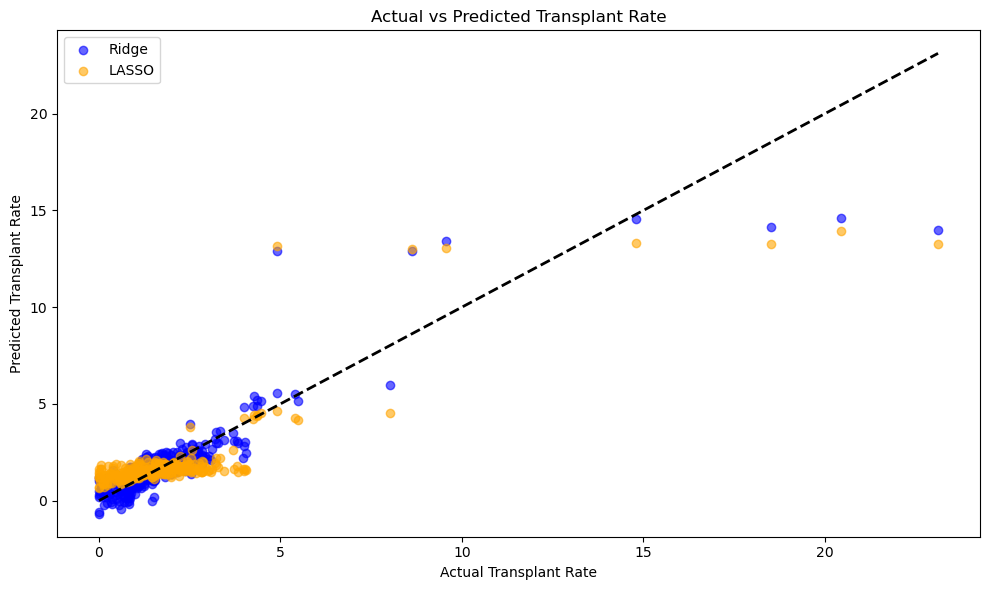


----- LASSO Path Plot -----


/tmp/ipykernel_429/460792355.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


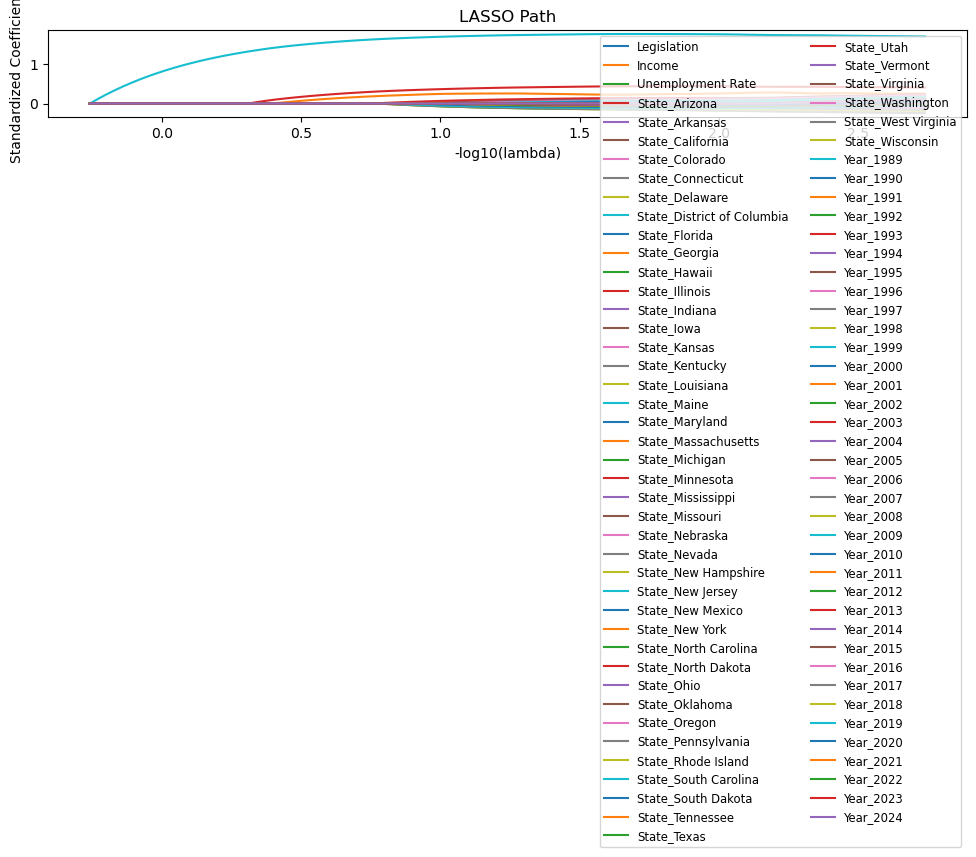


----- Cross-Validation Plots -----


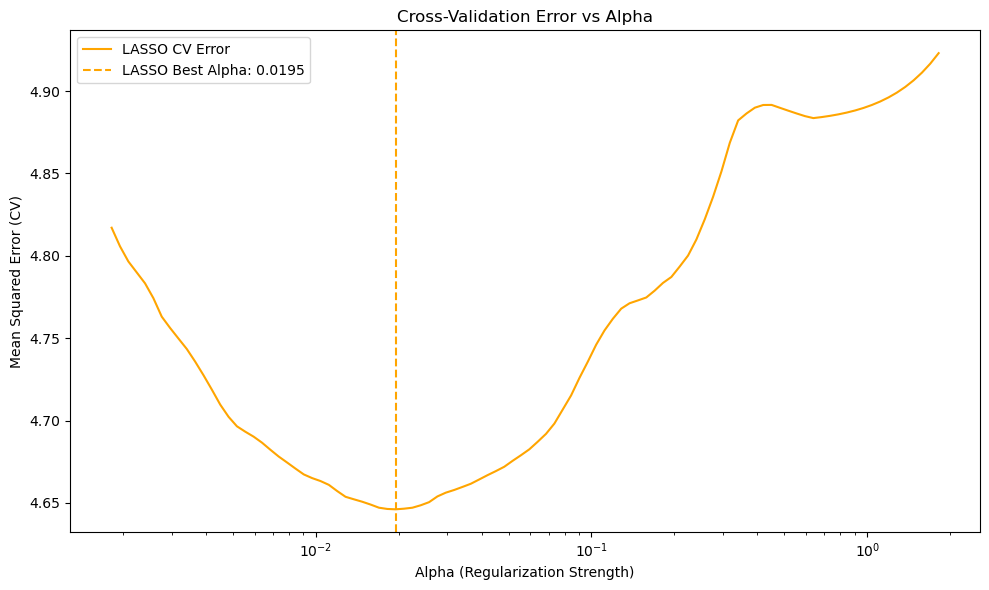

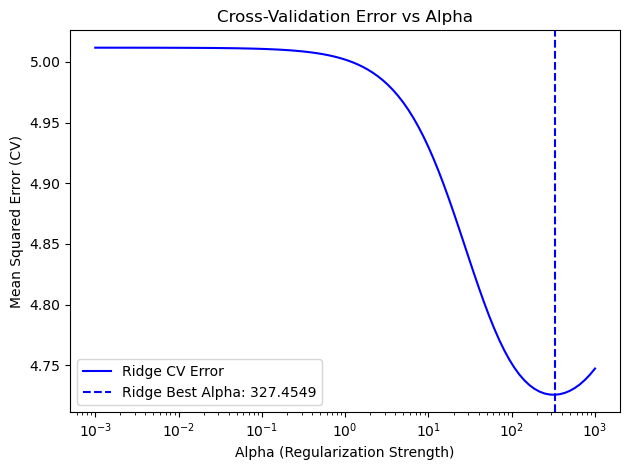

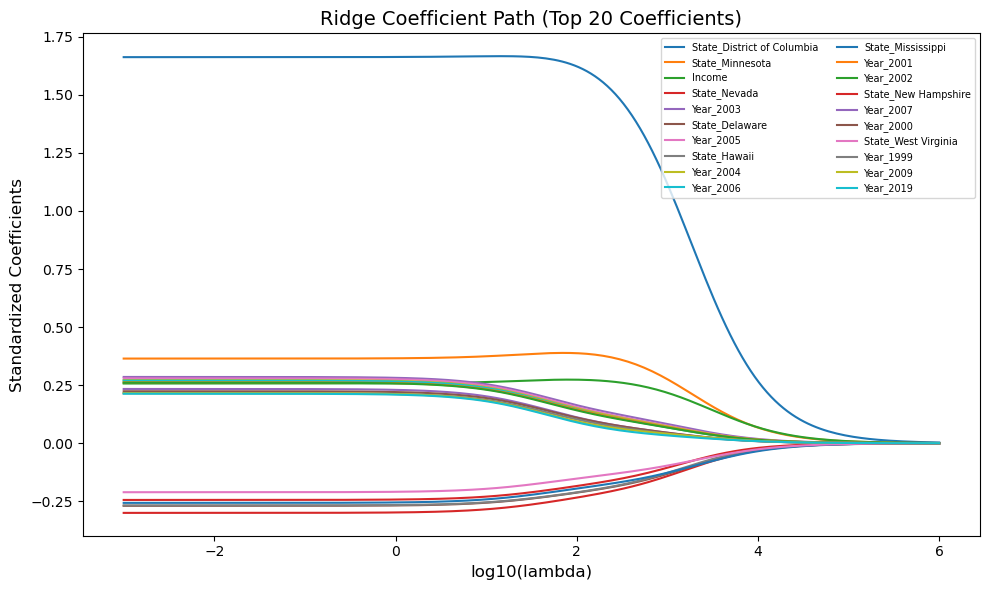

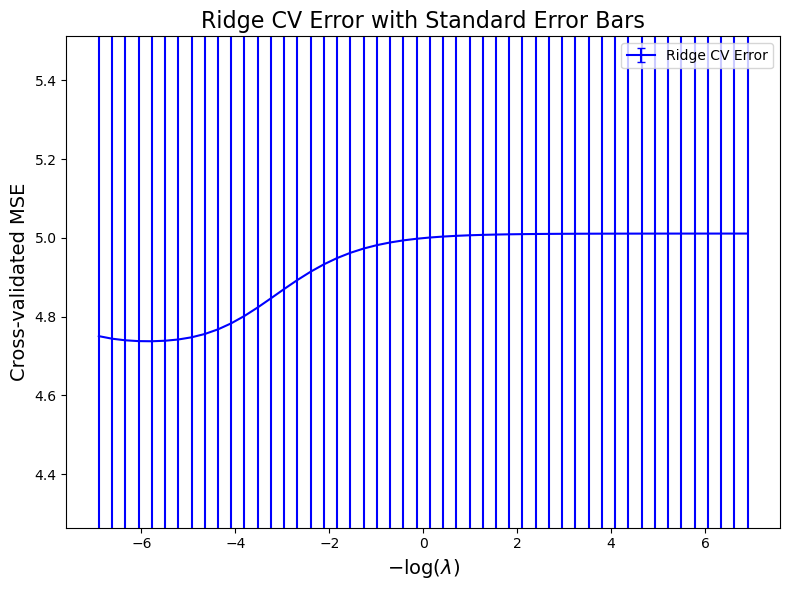

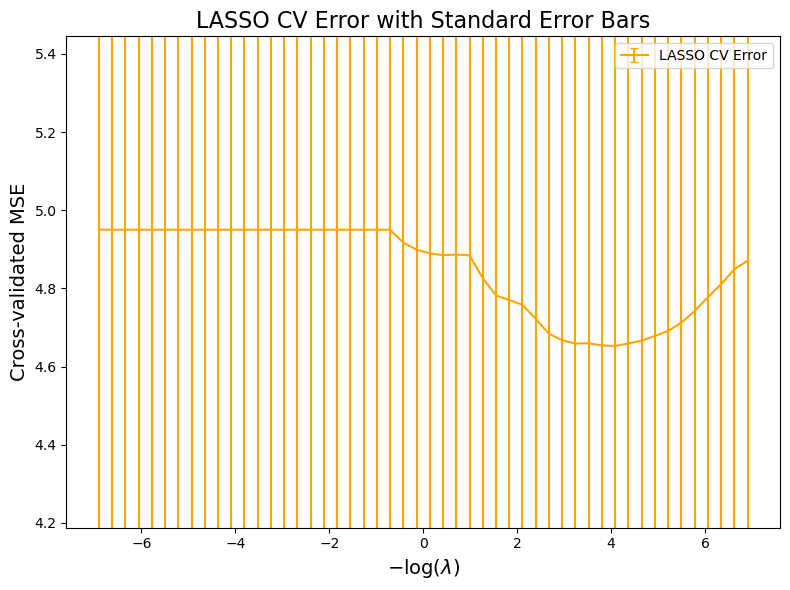

Mean Squared Error: 0.6521321841848399


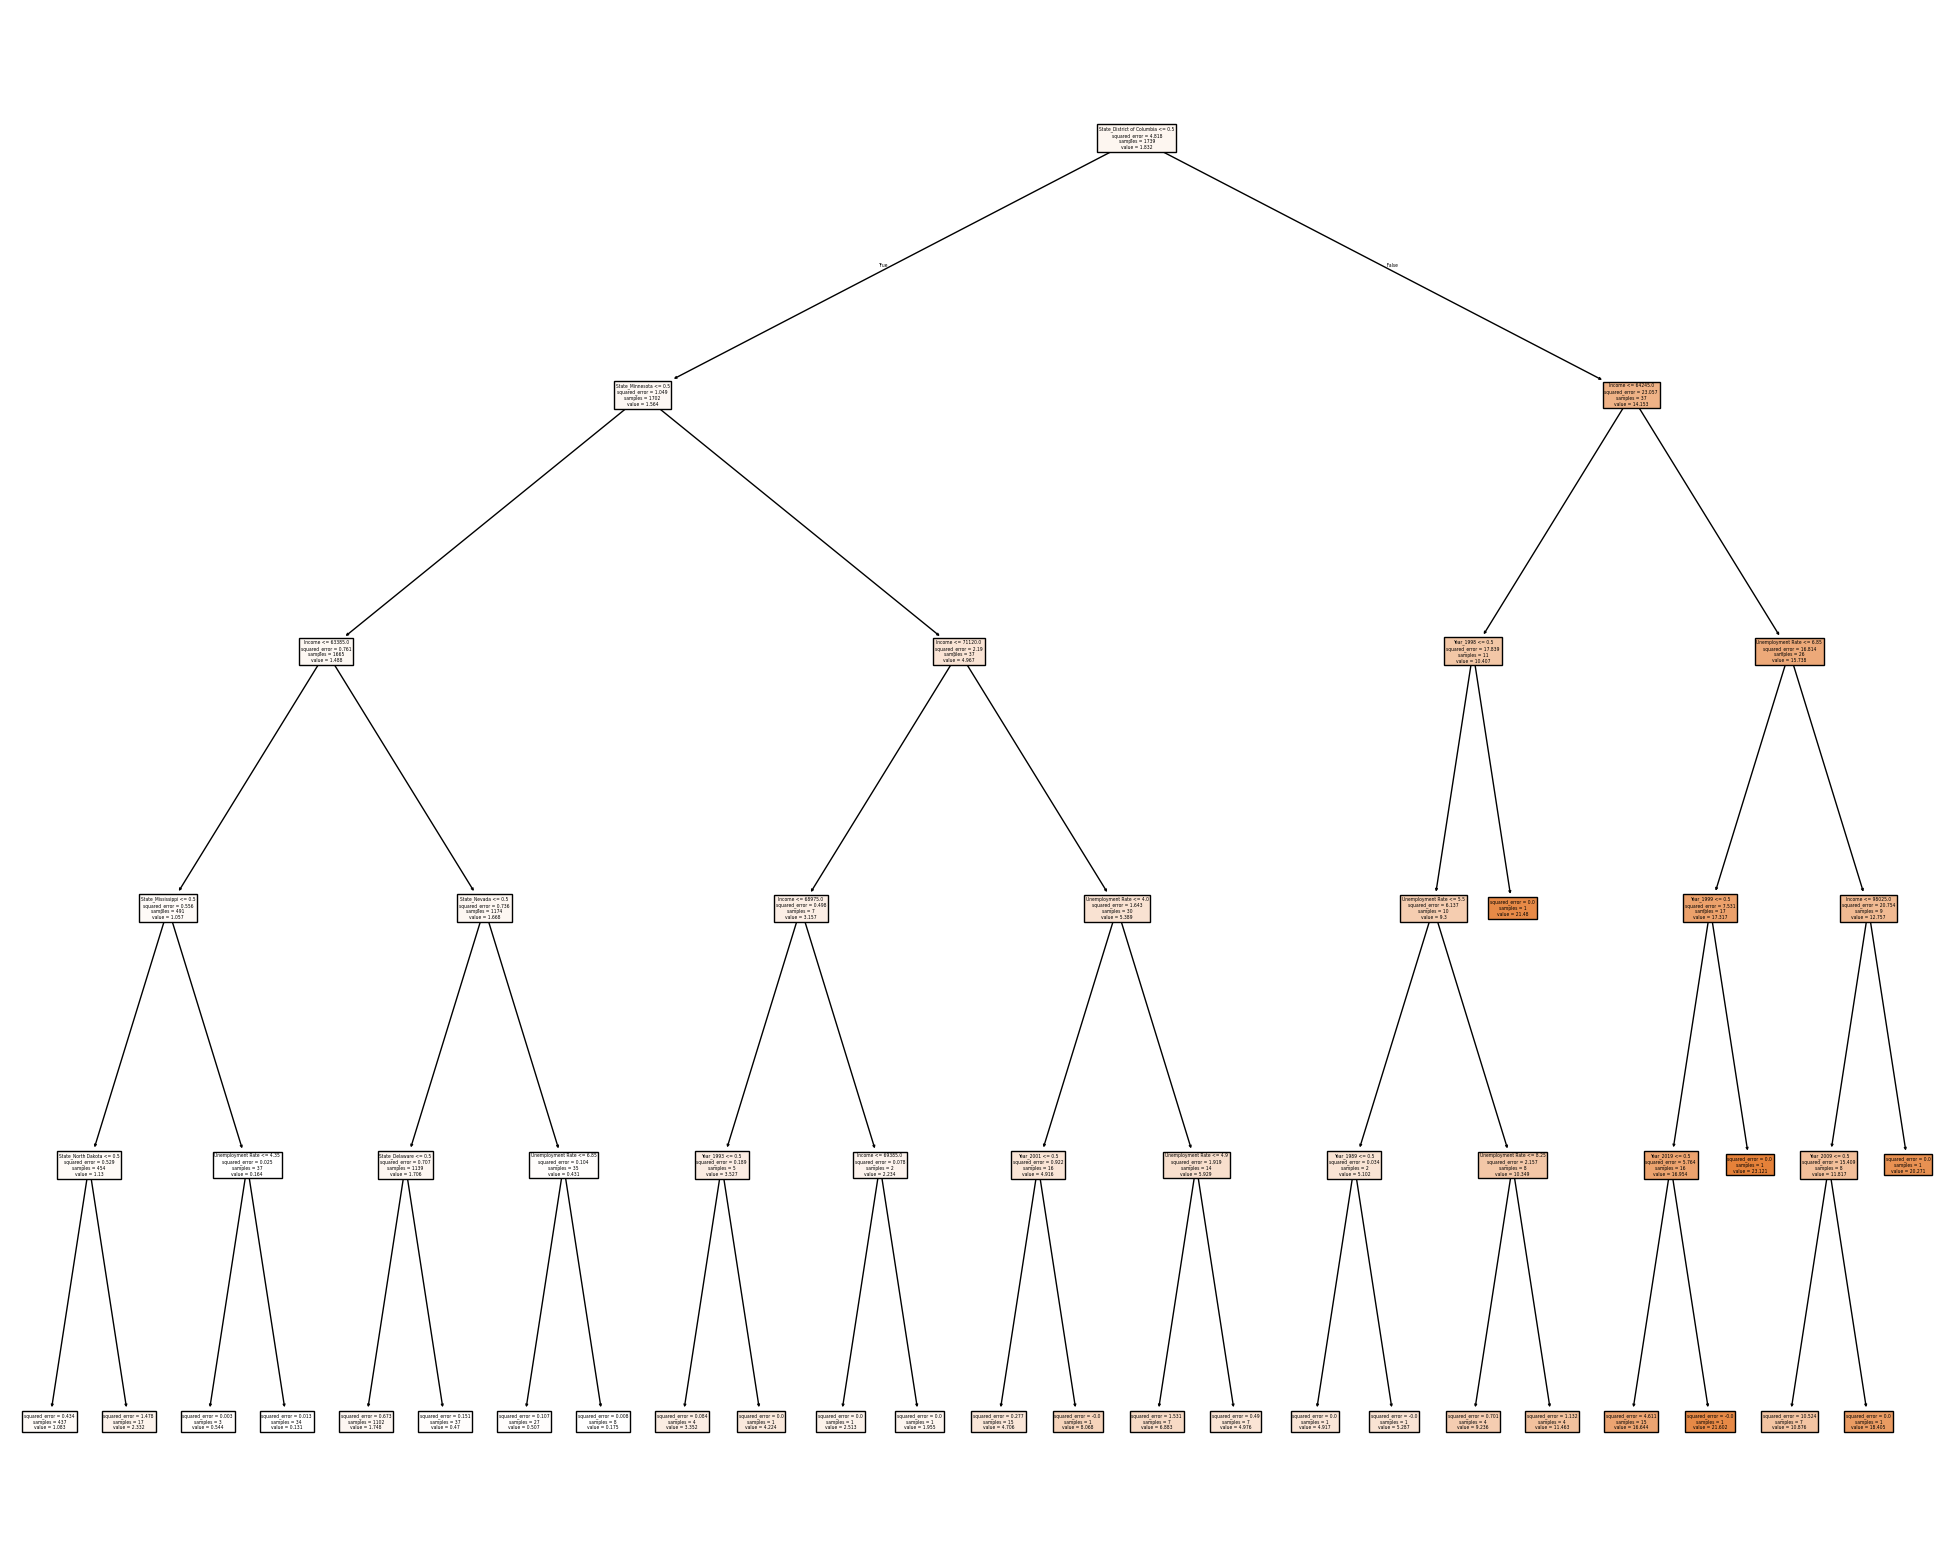

In [2]:




# LASSO plot
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), label='LASSO CV Error', color='orange')
plt.axvline(lasso_cv.alpha_, linestyle='--', color='orange', label=f'LASSO Best Alpha: {lasso_cv.alpha_:.4f}')


plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (CV)')
plt.title('Cross-Validation Error vs Alpha')
plt.legend()
plt.tight_layout()
plt.style.use('default')
plt.show()

# Ridge plot
plt.plot(alphas, ridge_errors, label='Ridge CV Error', color='blue')
best_ridge_alpha = alphas[np.argmin(ridge_errors)]
plt.axvline(best_ridge_alpha, linestyle='--', color='blue', label=f'Ridge Best Alpha: {best_ridge_alpha:.4f}')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (CV)')
plt.title('Cross-Validation Error vs Alpha')
plt.legend()
plt.tight_layout()
plt.style.use('default')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Reuse X and y from your fixed effects model
alphas = np.logspace(-3, 6, 200)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
for i in top_20_indices:
    plt.plot(np.log10(alphas), [coef[i] for coef in coefs], label=X.columns[i])

plt.xlabel('log10(lambda)', fontsize=12)

plt.ylabel('Standardized Coefficients', fontsize=12)

plt.title('Ridge Coefficient Path (Top 20 Coefficients)', fontsize=14)
plt.legend(fontsize='x-small', ncol=2, loc='best')
plt.tight_layout()
plt.style.use('default')
plt.show()

K = 5  # number of CV folds
alphas = np.logspace(-3, 3, 50)

# ==== Ridge ====
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
ridge_grid = GridSearchCV(ridge_pipeline,
                          param_grid={'ridge__alpha': alphas},
                          scoring='neg_mean_squared_error',
                          cv=K,
                          return_train_score=True)
ridge_grid.fit(X_scaled, y)

# ==== LASSO ====
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
lasso_grid = GridSearchCV(lasso_pipeline,
                          param_grid={'lasso__alpha': alphas},
                          scoring='neg_mean_squared_error',
                          cv=K,
                          return_train_score=True)
lasso_grid.fit(X, y)

# ==== PLOT RIDGE ====
ridge_fig, ax = plt.subplots(figsize=(8, 6))

ridge_means = -ridge_grid.cv_results_['mean_test_score']
ridge_stds = ridge_grid.cv_results_['std_test_score']
ridge_se = ridge_stds / np.sqrt(K)
plt.style.use('default')
ax.errorbar(-np.log(alphas), ridge_means, yerr=ridge_se, label='Ridge CV Error', color='blue', capsize=3)
ax.set_xlabel('$-\\log(\\lambda)$', fontsize=14)
ax.set_ylabel('Cross-validated MSE', fontsize=14)
ax.set_title('Ridge CV Error with Standard Error Bars', fontsize=16)
ax.set_ylim([ridge_means.min() * 0.9, ridge_means.max() * 1.1])
ax.legend()
plt.tight_layout()
plt.show()

# ==== PLOT LASSO ====
lasso_fig, ax = plt.subplots(figsize=(8, 6))

lasso_means = -lasso_grid.cv_results_['mean_test_score']
lasso_stds = lasso_grid.cv_results_['std_test_score']
lasso_se = lasso_stds / np.sqrt(K)
plt.style.use('default')
ax.errorbar(-np.log(alphas), lasso_means, yerr=lasso_se, label='LASSO CV Error', color='orange', capsize=3)
ax.set_xlabel('$-\\log(\\lambda)$', fontsize=14)
ax.set_ylabel('Cross-validated MSE', fontsize=14)
ax.set_title('LASSO CV Error with Standard Error Bars', fontsize=16)
ax.set_ylim([lasso_means.min() * 0.9, lasso_means.max() * 1.1])
ax.legend()
plt.tight_layout()
plt.show()



sqft_tree = tree.DecisionTreeRegressor(max_depth=5).fit(X,y)

y_pred_tree = sqft_tree.predict(X)


print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

plt.figure(figsize=(25,20))
tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)


plt.show()


In [3]:
import pandas as pd
import statsmodels.api as sm

# START FROM CLEANED SUBSET
df = merged.copy()


df = df[df['Donor Type'] == 'Living Donor']
df = df.dropna(subset=['Transplant Rate', 'Legislation', 'Income'])


df['State'] = df['State'].astype('category')
df['Year'] = df['Year'].astype('category')


formula = 'Q("Transplant Rate") ~ Legislation + Income + C(State) + C(Year)'

# Fit model using patsy + statsmodels
model = sm.OLS.from_formula(formula, data=df).fit()

# Print regression output
print(model.summary())

from statsmodels.iolib.summary2 import summary_col

# One model case
reg_summary = summary_col([model], stars=True, model_names=['OLS'])
print(reg_summary)


with open("regression_table.tex", "w") as f:
    f.write(reg_summary.as_latex())

                             OLS Regression Results                             
Dep. Variable:     Q("Transplant Rate")   R-squared:                       0.862
Model:                              OLS   Adj. R-squared:                  0.855
Method:                   Least Squares   F-statistic:                     123.1
Date:                  Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                          22:42:47   Log-Likelihood:                -2112.2
No. Observations:                  1739   AIC:                             4394.
Df Residuals:                      1654   BIC:                             4859.
Df Model:                            84                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

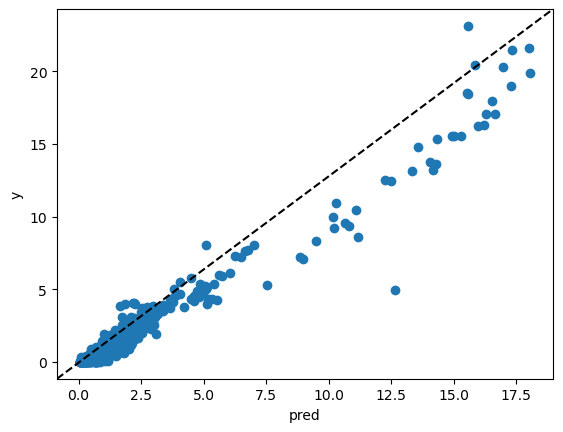

0.12383885169757085


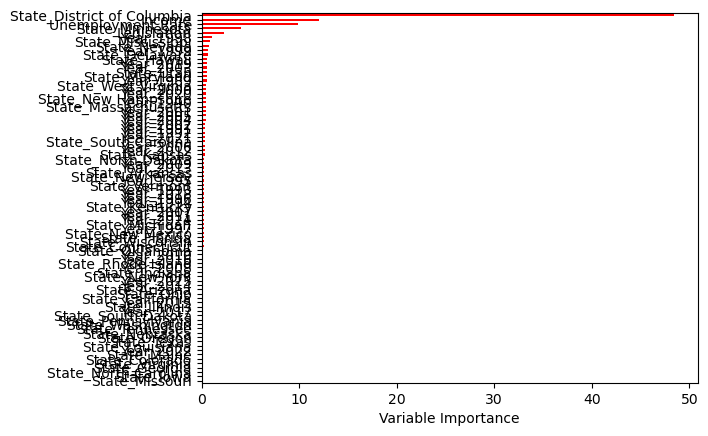

In [4]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regr_bagg = RandomForestRegressor(max_features= 18, random_state=1) 
regr_bagg.fit(X_train, y_train)


pred = regr_bagg.predict(X)

plt.scatter(pred, y, label='log price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y')
plt.show()

# define and fit
regr_RF = RandomForestRegressor(max_features=5, random_state=1).fit(X, y)

#predict
pred = regr_RF.predict(X_test)

#calculate MSE
mean_squared_error(y_test, pred)
print(mean_squared_error(y_test, pred))

Importance = pd.DataFrame({'Importance':regr_RF.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None



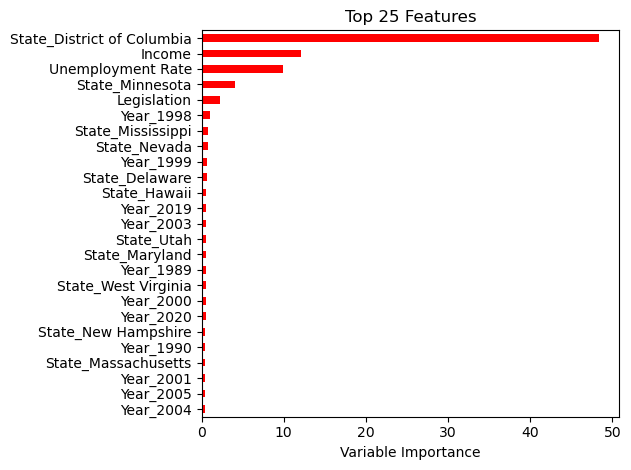

In [5]:

Importance = pd.DataFrame({'Importance':regr_RF.feature_importances_*100}, index=X.columns)
top_n = 25
top_importance = Importance.sort_values('Importance', ascending=False).head(top_n).sort_values('Importance')


top_importance.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.title(f'Top {top_n} Features')
plt.gca().legend_ = None
plt.tight_layout()
plt.show()


Mean Squared Error: 1.395661203238833


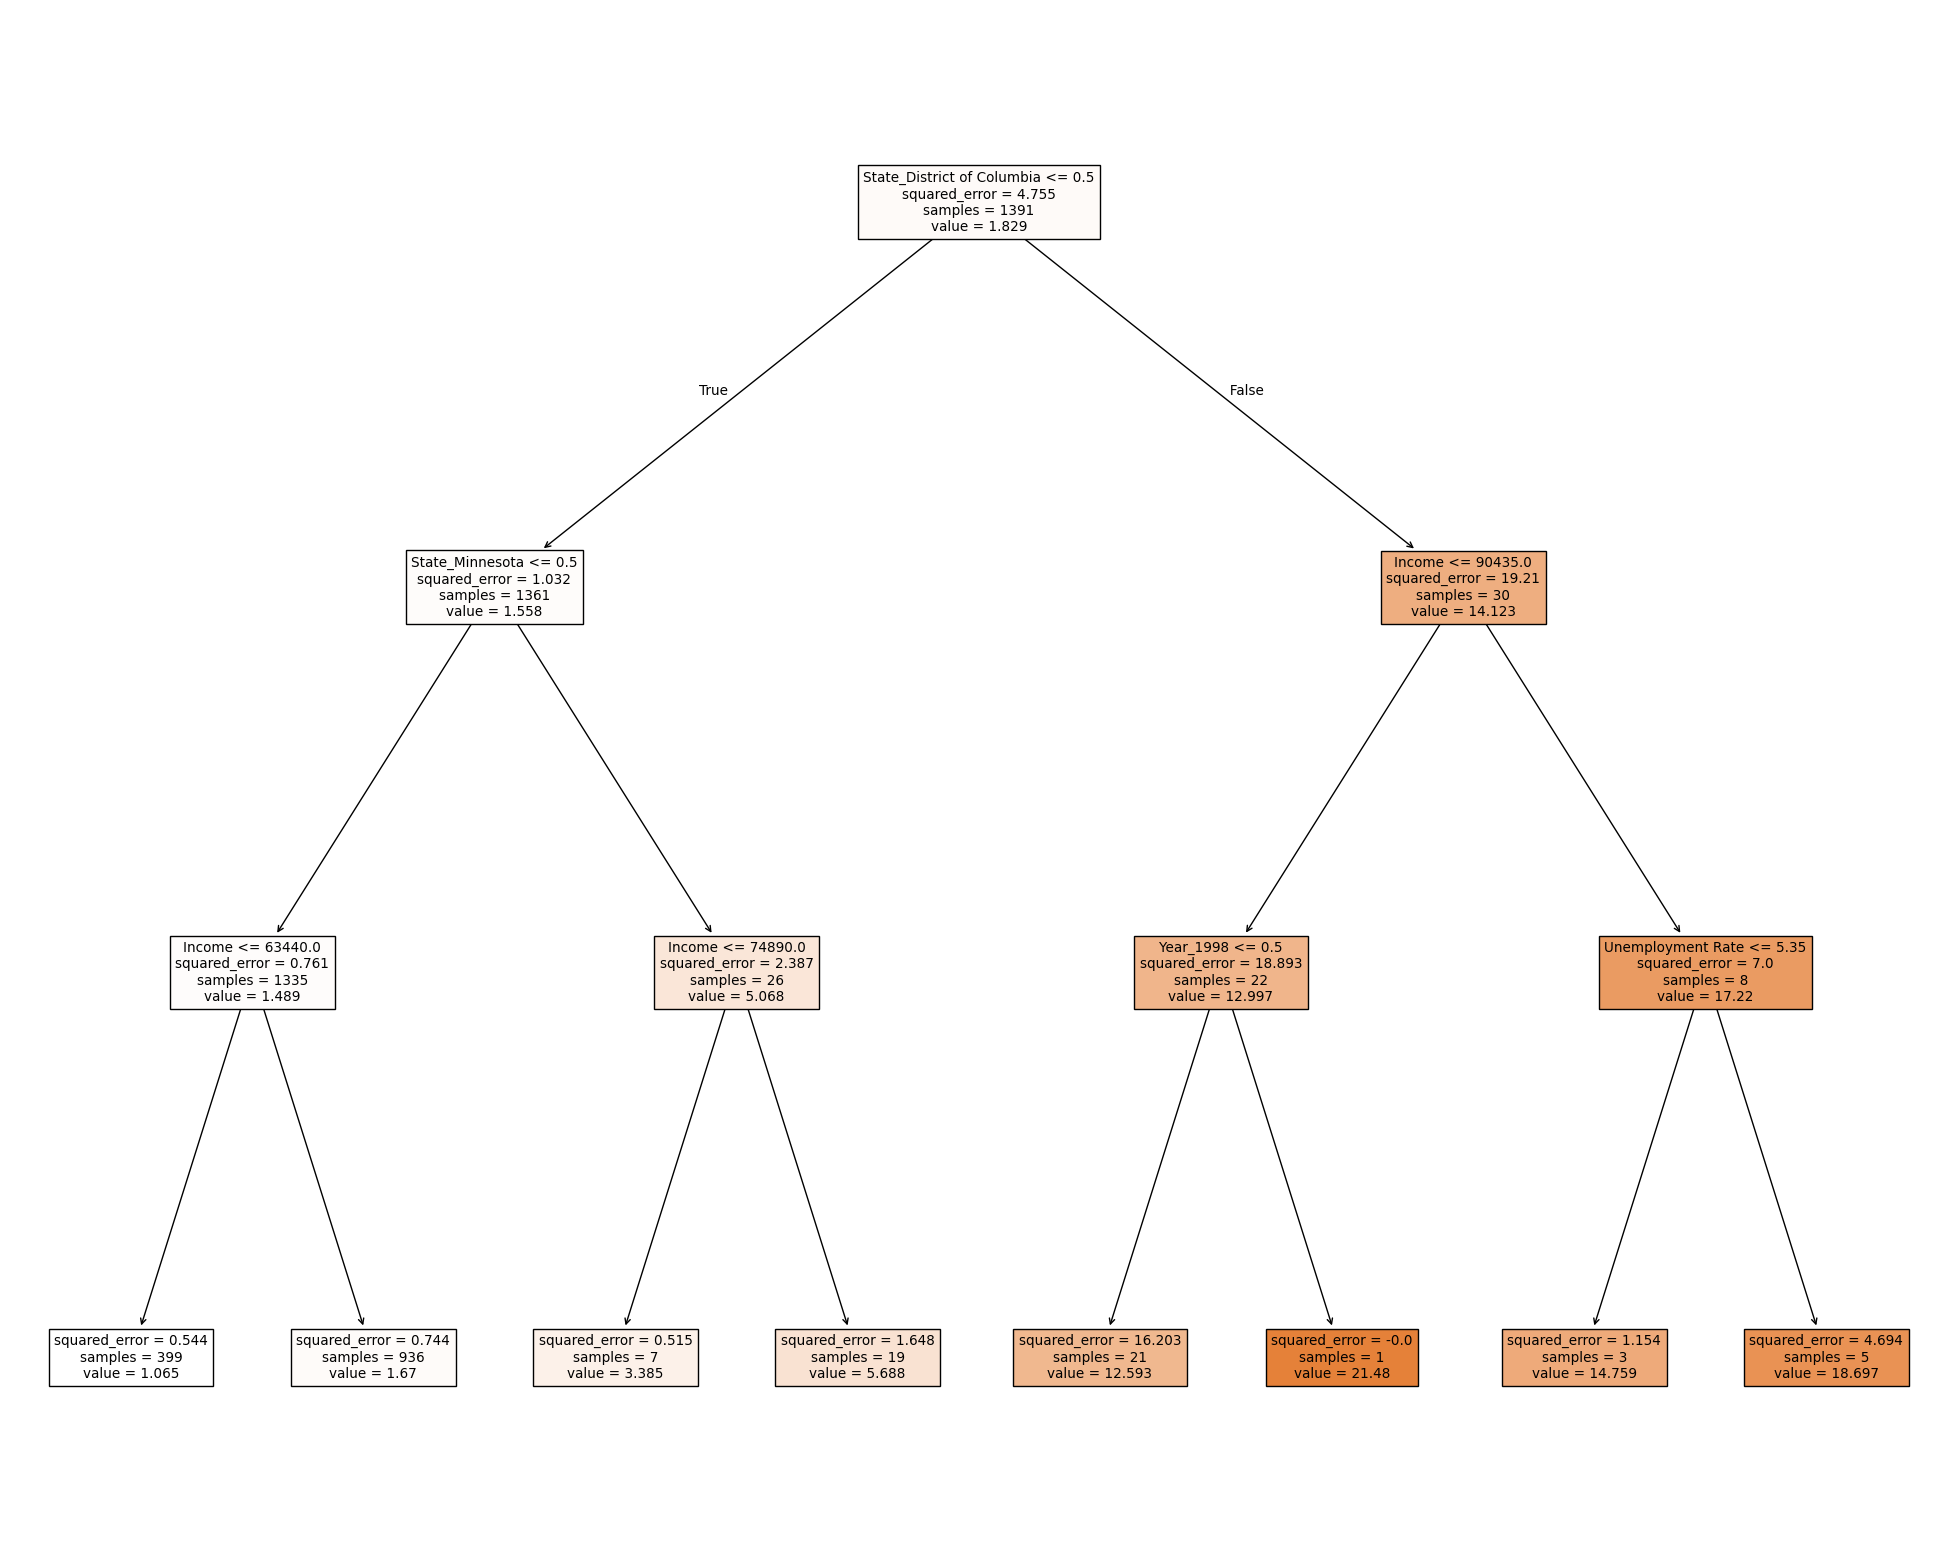

In [6]:

sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)


y_pred_tree = sqft_tree.predict(X_test)



print('MSE:', metrics.mean_squared_error(y_test, y_pred_tree))

plt.figure(figsize=(25,20))
tree.plot_tree(sqft_tree, feature_names=X_test.columns, filled=True

plt.show()

0.7260094972590484


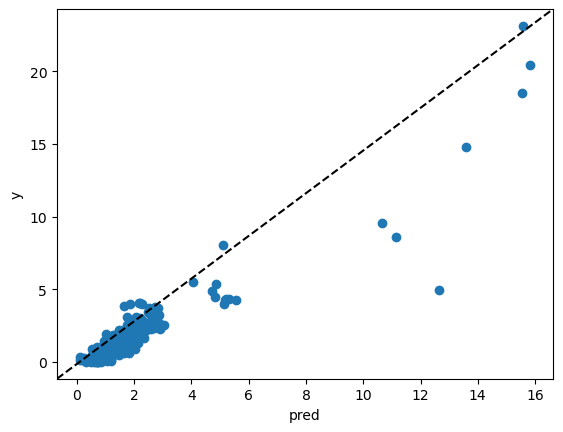

In [7]:
#BAGGING


regr_bagg = RandomForestRegressor(max_features= 18, random_state=1) 
regr_bagg.fit(X_train, y_train)


pred = regr_bagg.predict(X_test)

plt.scatter(pred, y_test, label='log price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y')


mean_squared_error(y_test, pred)

print(mean_squared_error(y_test, pred))

In [8]:



dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 10,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'seed': 42
}
watchlist = [(dtrain, 'train'), (dtest, 'eval')]



mymodel = xgb.train(params, dtrain, num_boost_round=1000,       
    evals=watchlist,
    early_stopping_rounds=50,      
    verbose_eval=True
)

 
y_pred = mymodel.predict(dtest)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best RMSE:", mymodel.best_score)
print("Best boosting round:", model.best_iteration)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='grey', alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('Y vs Predicted Y (Y hat)')
plt.show()

[0]	train-rmse:2.11308	eval-rmse:2.20370
[1]	train-rmse:1.97429	eval-rmse:2.06032
[2]	train-rmse:1.81674	eval-rmse:1.90785
[3]	train-rmse:1.68630	eval-rmse:1.78880
[4]	train-rmse:1.56061	eval-rmse:1.67180
[5]	train-rmse:1.45969	eval-rmse:1.58060
[6]	train-rmse:1.43117	eval-rmse:1.57430
[7]	train-rmse:1.39873	eval-rmse:1.55449
[8]	train-rmse:1.30522	eval-rmse:1.47504
[9]	train-rmse:1.27484	eval-rmse:1.46327
[10]	train-rmse:1.26604	eval-rmse:1.45542
[11]	train-rmse:1.25515	eval-rmse:1.44846
[12]	train-rmse:1.18935	eval-rmse:1.39262
[13]	train-rmse:1.17050	eval-rmse:1.38722
[14]	train-rmse:1.10414	eval-rmse:1.32496
[15]	train-rmse:1.03715	eval-rmse:1.26440
[16]	train-rmse:0.99663	eval-rmse:1.23047
[17]	train-rmse:0.98493	eval-rmse:1.22652
[18]	train-rmse:0.93626	eval-rmse:1.18706
[19]	train-rmse:0.92897	eval-rmse:1.18169
[20]	train-rmse:0.91109	eval-rmse:1.18049
[21]	train-rmse:0.90249	eval-rmse:1.17684
[22]	train-rmse:0.87535	eval-rmse:1.16950
[23]	train-rmse:0.83344	eval-rmse:1.13752
[2

[194]	train-rmse:0.19628	eval-rmse:0.92912
[195]	train-rmse:0.19505	eval-rmse:0.92869
[196]	train-rmse:0.19469	eval-rmse:0.92844
[197]	train-rmse:0.19385	eval-rmse:0.92860
[198]	train-rmse:0.19349	eval-rmse:0.92832
[199]	train-rmse:0.19226	eval-rmse:0.92847
[200]	train-rmse:0.19153	eval-rmse:0.92851
[201]	train-rmse:0.18982	eval-rmse:0.92805
[202]	train-rmse:0.18937	eval-rmse:0.92825
[203]	train-rmse:0.18856	eval-rmse:0.92939
[204]	train-rmse:0.18825	eval-rmse:0.92888
[205]	train-rmse:0.18761	eval-rmse:0.92855
[206]	train-rmse:0.18735	eval-rmse:0.92844
[207]	train-rmse:0.18607	eval-rmse:0.92861
[208]	train-rmse:0.18543	eval-rmse:0.92828
[209]	train-rmse:0.18493	eval-rmse:0.92814
Mean Squared Error: 0.8614434950981232
Best RMSE: 0.9246807225931838


AttributeError: 'OLSResults' object has no attribute 'best_iteration'

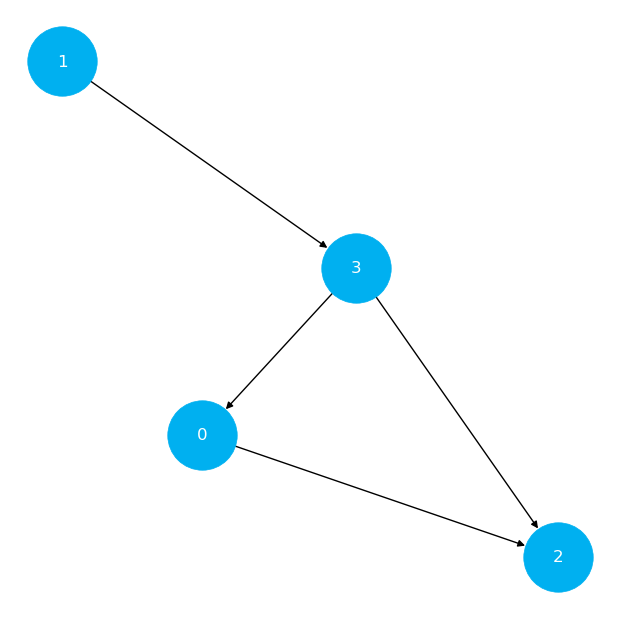

TypeError: object of type 'Digraph' has no len()

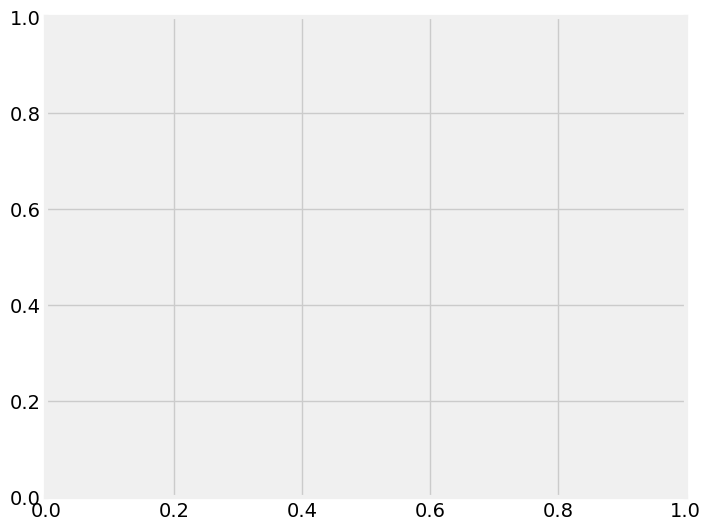

In [9]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

COLORS = [
    '#00B0F0',
    '#FF0000'
]

nodes = ['A', 'B', 'C', 'D']

# Define graphs
graphs = {
    
    'DAG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },
    
    'DCG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'AD', 'BB', 'BC', 'DC', 'CA']
    },
    
    'Undirected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    }, 
    
    'Fully connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']
    },
    
    'Partially connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'BC']
    }
}

graphs


# Iterate over graphs and render
for name, graph in graphs.items():
    
    [graph['graph'].node(n) for n in nodes]
    graph['graph'].edges(graph['edges'])
    
    graph['graph'].render(f'img/ch_04_graph_{name}')
    
    graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2', '3']

edges = ['02', '13', '32', '30']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'img/ch_04_graph_adj_02')

graph


import networkx as nx

'''
# Define the graph
sample_gml = graph [directed 1, node [id 0 label "0"]

node [
    id 1
    label "1"
    ]
    
node [
    id 2
    label "2"
    ]


edge [
    source 0
    target 1
    ]
    
edge [
    source 2
    target 1
    ]]
    
'''

import networkx as nx
import matplotlib.pyplot as plt

nodes = ['0', '1', '2', '3']
edges = [('0','2'), ('1','3'), ('3','2'), ('3','0')]

# Create a NetworkX DiGraph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw it
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_size=2500, node_color='#00B0F0', font_color='white')
plt.show()
# Get the graph
#graph = nx.parse_gml(sample_gml)

# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=2500,
    node_color=COLORS[0],
    font_color='white'
)

# Define the matrix
adj_matrix = np.array([
    [0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

# Get the graph
graph = nx.from_numpy_matrix(adj_matrix, create_using=nx.DiGraph)

# Plot
nx.draw(
    G=graph, 
    with_labels=True,
    node_size=2000,
    node_color=COLORS[0],
    font_color='white',
    pos=nx.planar_layout(graph)
)

In [12]:
     State  1988  1989  1990  1991  1992  1993  1994  1995  \
0                Alabama    8002    800    800    800    800    800    800    800     
2                Arizona    18008008    800    800    800    800    800    800    800   
3               Arkansas    800    800    800    800    800    800    800    800   


IndentationError: unexpected indent (2149795546.py, line 1)

In [13]:

cleaned = cleaned.sort_values(['State', 'Year'])


cleaned['Legislation_lag2'] = cleaned.groupby('State')['Legislation'].shift(2)
cleaned = cleaned.dropna(subset=['Legislation_lag2'])

cleaned_dummies = pd.get_dummies(cleaned, columns=['State', 'Year'], drop_first=True)


X = cleaned_dummies.drop(['Transplant Rate', 'Donor Type', 'Transplants', 'Poverty Rate', 'Population', 'Legislation'], axis=1, errors='ignore')
y = cleaned_dummies['Transplant Rate']


X_ols = X
y_ols = y

valid_idx = X_ols.dropna().index.intersection(y_ols.dropna().index)
    
X_ols = X_ols.loc[valid_idx]
y_ols = y_ols.loc[valid_idx]
X_ols = X_ols.apply(pd.to_numeric, errors='coerce').astype(float)


X_ols = sm.add_constant(X_ols)

groups = cleaned.loc[X_ols.index, 'State']

ols_lagmodel = sm.OLS(y_ols, X_ols).fit(
    cov_type='cluster',
    cov_kwds={'groups': groups}
)

print(ols_lagmodel.summary())


1645 1645 1645
                            OLS Regression Results                            
Dep. Variable:        Transplant Rate   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     122.9
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           1.17e-35
Time:                        22:51:12   Log-Likelihood:                -1917.5
No. Observations:                1645   AIC:                             4003.
Df Residuals:                    1561   BIC:                             4457.
Df Model:                          83                                         
Covariance Type:              cluster                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 37
  warnings.warn('covariance of constraints does not have full '


/tmp/ipykernel_429/2100749556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Year', 'Legislation'])['Transplant Rate'].mean().unstack().plot()


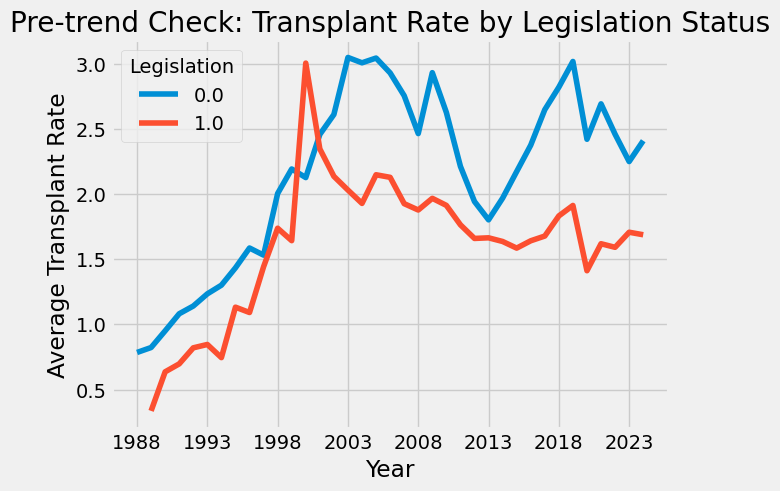

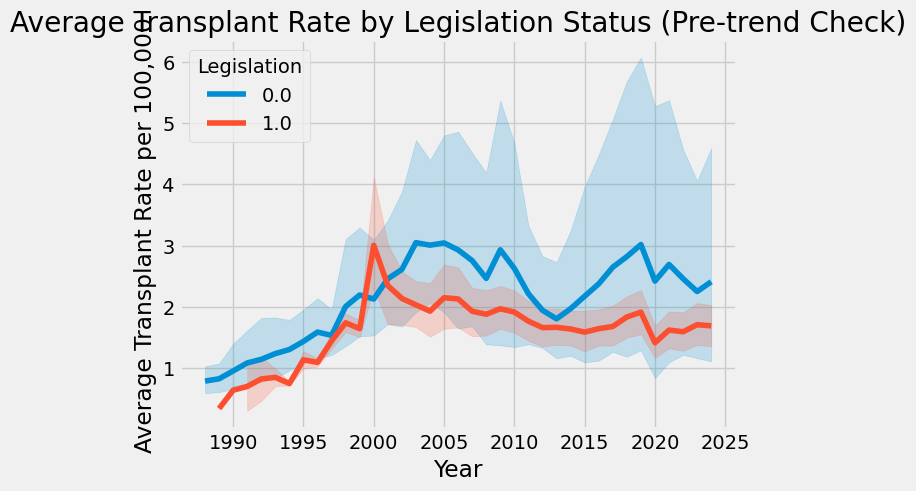

In [14]:
df.groupby(['Year', 'Legislation'])['Transplant Rate'].mean().unstack().plot()
plt.title("Pre-trend Check: Transplant Rate by Legislation Status")
plt.ylabel("Average Transplant Rate")
plt.show()

import seaborn as sns
sns.lineplot(
    data=df,
    x='Year', y='Transplant Rate',
    hue='Legislation',
    estimator='mean'
)
plt.title('Average Transplant Rate by Legislation Status (Pre-trend Check)')
plt.ylabel('Average Transplant Rate per 100,000')
plt.show()


Unique policy years found:
          State  Policy_Year
140    Colorado       1990.0
1190     Oregon       1991.0
630    Maryland       2000.0
1610  Wisconsin       2000.0
1015   New York       2001.0
1120       Ohio       2001.0
805    Missouri       2001.0
490      Kansas       2001.0
1505   Virginia       2001.0
210    Delaware       2001.0
1155   Oklahoma       2002.0
420     Indiana       2002.0
385    Illinois       2002.0
595       Maine       2002.0
315     Georgia       2002.0

Number of treated states: 33

Treated pre rows: 404, Control pre rows: 476

Income balance test — T-statistic: -4.970, p-value: 0.000

Full t-test output:
TtestResult(statistic=np.float64(-4.969688749563079), pvalue=np.float64(8.063723993992004e-07), df=np.float64(876.9595506101205))


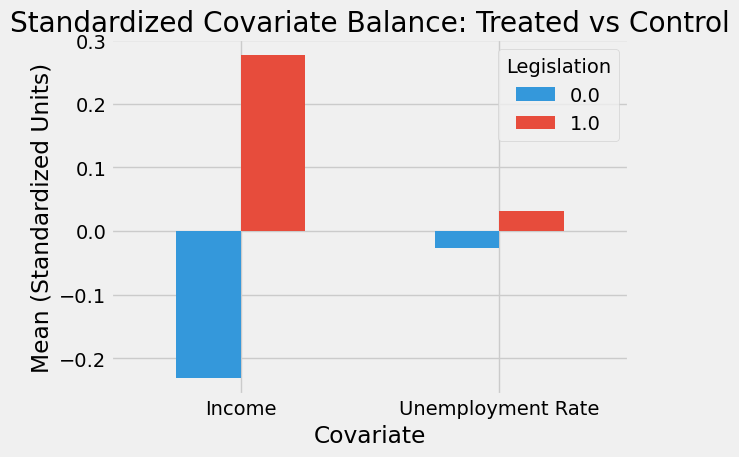

In [16]:
from sklearn.preprocessing import StandardScaler

covariates = ['Income', 'Unemployment Rate']
scaled = cleaned[covariates].apply(lambda x: (x - x.mean()) / x.std())
scaled['Legislation'] = cleaned['Legislation']

means = scaled.groupby('Legislation')[covariates].mean().T
means.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Standardized Covariate Balance: Treated vs Control')
plt.ylabel('Mean (Standardized Units)')
plt.xlabel('Covariate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:

vars_to_describe = [
    'Transplant Rate', 'Income', 'Unemployment Rate',
    'Population', 'Poverty Rate', 'Legislation'
]

desc = cleaned[vars_to_describe].describe().T  # Transpose for readability
desc = desc[['mean', 'std', 'min', 'max']]     # Keep key summary stats
desc.rename(columns={
    'mean': 'Mean', 'std': 'Std. Dev.', 'min': 'Min', 'max': 'Max'
}, inplace=True)

# Round for clean presentation
desc_rounded = desc.round(3)

# Export to LaTeX table
latex_table = desc_rounded.to_latex(
    index=True,
    caption="Descriptive Statistics of Key Variables",
    label="tab:descstats",
    escape=False,
    column_format='lcccc'
)

with open("descriptive_stats.tex", "w") as f:
    f.write(latex_table)

print(latex_table)

\begin{table}
\caption{Descriptive Statistics of Key Variables}
\label{tab:descstats}
\begin{tabular}{lcccc}
\toprule
 & Mean & Std. Dev. & Min & Max \\
\midrule
Transplant Rate & 1.891000 & 2.235000 & 0.000000 & 23.121000 \\
Income & 71845.015000 & 12942.031000 & 41070.000000 & 115800.000000 \\
Unemployment Rate & 5.311000 & 1.918000 & 1.800000 & 13.500000 \\
Population & 6259.754000 & 6688.891000 & 519.000000 & 39521.958000 \\
Poverty Rate & 12.560000 & 3.696000 & 3.700000 & 26.400000 \\
Legislation & 0.457000 & 0.498000 & 0.000000 & 1.000000 \\
\bottomrule
\end{tabular}
\end{table}



In [18]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import Ridge, Lasso, lasso_path, RidgeCV, LassoCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import r2_score, mean_absolute_error
    from sklearn.model_selection import GridSearchCV, KFold
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    import statsmodels.api as sm
    from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
    !pip install -q xgboost
    !pip install -q dowhy
    !pip install -q lightgbm
    !pip install -q econml
    
    
    import xgboost as xgb
    from sklearn.model_selection import cross_val_predict

    
    statecount = pd.read_csv('Organ Counts by State.csv')
    print(statecount)
    
 

    
    
    # For a CSV file
    df = pd.read_csv('US Transplants Cleaned.csv')
    
    print(df)
    living_donors = df[df['Donor Type'] == 'Living Donor']
    mean_transplants = living_donors['Transplants'].mean()
    std_transplants = living_donors['Transplants'].std()
    
    
    df = df[df['Donor Type'] == 'Living Donor']
    
    
 
    print(mean_transplants, std_transplants)

    print(df)
    
   
    
    popn = pd.read_csv('Annual US State Populations 3.csv')


    
    
    
    
    pop_long = popn.melt(id_vars='observation_date', var_name='State', value_name='Population')


    pop_long.rename(columns={'observation_date': 'Year'}, inplace=True)
    


    
    txrate = pd.merge(df, pop_long, on=['State', 'Year'], how='left')

    txrate['Transplant Rate'] = (txrate['Transplants'] / txrate['Population']) * 100
    
    txrate = pd.merge(df, pop_long, on=['State', 'Year'], how='left')
    
    df['Year'] = df['Year'].astype(int)
    pop_long['Year'] = pop_long['Year'].astype(int)
    
    txrate['Transplant Rate'] = (txrate['Transplants'] / txrate['Population']) * 100
    
    print(txrate[['State', 'Year', 'Donor Type', 'Transplants', 'Population', 'Transplant Rate']].head())
    
    
   
    
        
    income = pd.read_csv("State Income Per Year.csv")
    
    income_long = income.melt(id_vars='Unnamed: 0', var_name='State', value_name='Income')

    # Rename to match other data
    income_long.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
    income_long['Year'] = income_long['Year'].astype(int)
    income_long['State'] = income_long['State'].str.strip()

    law = pd.read_csv("Organ Legislation by State.csv")

    
    
    
    law_long = law.melt(id_vars='observation_date', var_name='State', value_name='Legislation')

    law_long.rename(columns={'observation_date': 'Year'}, inplace=True)
    law_long['Year'] = law_long['Year'].astype(int)
    law_long['State'] = law_long['State'].str.strip()


    
    
    poverty = pd.read_csv("poverty_rate_by_state_corrected.csv")
    
    unemp = pd.read_csv("Annual Unemployment Rate by State.csv")
    
    

    

    merged = pd.merge(txrate, law_long, on=['State', 'Year'], how='left')

    merged = pd.merge(merged, income_long, on=['State', 'Year'], how='left')


    
    unemp_long = unemp.melt(id_vars='observation_date', var_name='State', value_name='Unemployment Rate')
    unemp_long.rename(columns={'observation_date': 'Year'}, inplace=True)


    
    

    merged = pd.merge(merged, poverty, on=['State', 'Year'], how='left')

    merged = pd.merge(merged, unemp_long, on=['State', 'Year'], how='left')

    

    
    missing_states = set(txrate['State'].unique()) - set(income_long['State'].unique())
    print("States missing from income file:", missing_states)
    
    model_cols = ['Transplant Rate', 'Legislation', 'Income', 'Unemployment Rate']

    cleaned = merged[merged['Donor Type'] == 'Living Donor']
    cleaned = cleaned.dropna(subset=model_cols)

    print("Before dropping NaNs:", merged.shape)
    print("After dropping NaNs:", cleaned.shape)
    
    merged.to_csv("final_transplant_dataset_full_cleaned.csv", index=False)
    
    print("FILE")
    
    print(merged)
    



    

    
    cleaned = merged[merged['Donor Type'] == 'Living Donor']
    cleaned = cleaned.dropna(subset=['Transplant Rate', 'Legislation', 'Income', 'Unemployment Rate'])
    
        
    baseline = cleaned.loc[cleaned["Year"] == 1988, ["State", "Transplant Rate"]].copy()
    baseline = baseline.rename(columns={"Transplant Rate": "baseline"})
    cleaned = cleaned.merge(baseline, on="State", how="left")

    cleaned_time = cleaned
    # Add dummies for fixed effects
    cleaned_dummies = pd.get_dummies(cleaned, columns=['State', 'Year'], drop_first=True)
    
    print(cleaned_dummies)

                   State  1988  1989  1990  1991  1992  1993  1994  1995  \
0                Alabama    52    46    47    43    61    76    70    59   
1                 Alaska    10     7     7    13     8     8    16     9   
2                Arizona    18    23    36    21    26    48    47    36   
3               Arkansas    24    18    22    28    38    28    41    48   
4             California   163   159   197   230   274   345   397   404   
5               Colorado    20    17    25    17    17    34    30    44   
6            Connecticut    14    14    22    18    31    30    36    52   
7               Delaware     3     3     0     6     6     5    12     9   
8   District of Columbia     5     4     8     6    12    13     7    10   
9                Florida    61    73    82   103   106    94   114   139   
10               Georgia    59    62    55    66    73    73    90   106   
11                Hawaii     1     7     4     3    10     4    10    12   
12          

States missing from income file: set()
Before dropping NaNs: (1786, 10)
After dropping NaNs: (1739, 10)
FILE
          State    Donor Type  Year  Transplants  Population  Transplant Rate  \
0       Alabama  Living Donor  1988           60    4023.844         1.491111   
1       Alabama  Living Donor  1989           61    4030.222         1.513564   
2       Alabama  Living Donor  1990           62    4048.508         1.531428   
3       Alabama  Living Donor  1991           63    4091.025         1.539956   
4       Alabama  Living Donor  1992           74    4139.269         1.787755   
...         ...           ...   ...          ...         ...              ...   
1781  Wisconsin  Living Donor  2021          118    5881.608         2.006254   
1782  Wisconsin  Living Donor  2022           96    5903.975         1.626023   
1783  Wisconsin  Living Donor  2023          126    5930.405         2.124644   
1784  Wisconsin  Living Donor  2024          169    5960.975         2.835107   


hi
      Year  Transplant Rate  Legislation   Income  Unemployment Rate  baseline
0     1988         1.491111          0.0  47720.0                7.3  1.491111
1     1989         1.513564          0.0  48780.0                7.0  1.491111
2     1990         1.531428          0.0  51050.0                6.8  1.491111
3     1991         1.539956          0.0  51340.0                7.3  1.491111
4     1992         1.787755          0.0  53080.0                7.5  1.491111
...    ...              ...          ...      ...                ...       ...
1780  2020         2.373938          1.0  80850.0                6.4  1.721139
1781  2021         2.006254          1.0  80300.0                3.8  1.721139
1782  2022         1.626023          1.0  78170.0                2.8  1.721139
1783  2023         2.124644          1.0  81750.0                2.8  1.721139
1784  2024         2.835107          1.0  82560.0                3.0  1.721139

[1739 rows x 6 columns]
it's working
Estimated A

,Legislation,Transplant Rate,propensity_score
0,0.0,1.491111,0.210362
1,0.0,1.513564,0.212008
2,0.0,1.531428,0.226904
3,0.0,1.539956,0.242952
4,0.0,1.787755,0.265551


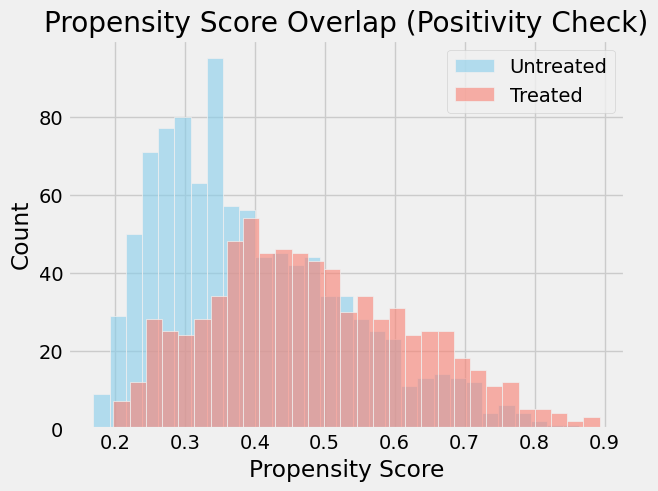

still working
Estimated ATE via PSM: -0.2119714740442727
IPW SE: 0.12157353268467594
IPW 95% CI: (np.float64(-1.1681011851429874), np.float64(-0.7099518898176289))
PSM SE: 0.08990769182768461
PSM 95% CI: (np.float64(-0.34218384052621365), np.float64(0.014749684611911895))


In [36]:

from copy import deepcopy



import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error

import dowhy
from dowhy import CausalModel

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from lightgbm import LGBMRegressor, LGBMClassifier

import networkx as nx

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

from sklearn.linear_model import LogisticRegression
from dowhy import CausalModel
from lightgbm import LGBMRegressor




print('hi')

cleaned_time = cleaned_time.drop(['Poverty Rate', 'Donor Type', 'Population', 'Transplants', 'State'], axis=1, errors='ignore')

print(cleaned_time)


 











nodes = [
    'Legislation', 'Transplant Rate', 'Income', 'Unemployment Rate',
]

edges = [
    ('Legislation', 'Transplant Rate'),
    ('Income', 'Legislation'),
    ('Unemployment Rate', 'Legislation'),
    ('Income', 'Transplant Rate'),
    ('Unemployment Rate', 'Transplant Rate')
]

gml_string_law = 'graph [directed 1\n'
for node in nodes:
    gml_string_law += f'\tnode [id "{node}" label "{node}"]\n'
for edge in edges:
    gml_string_law += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'
gml_string_law += ']'

print("it's working")

# Instantiate the CausalModel
model_law = CausalModel(
    data=cleaned_time,
    treatment='Legislation',
    outcome='Transplant Rate',
    graph=gml_string_law
)

# Identify effect
estimand_law = model_law.identify_effect()

# Get estimate (IPW weighting)
estimate_law = model_law.estimate_effect(
    identified_estimand=estimand_law,
    method_name='backdoor.propensity_score_weighting',
    target_units='ate',


)


print("Estimated ATE via IPW:", estimate_law.value)




import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


T = 'Legislation'         
Y = 'Transplant Rate'     

X_vars = ['Income', 'Unemployment Rate']


X = cleaned_time[X_vars]
T_data = cleaned_time[T]


ps_model = LogisticRegression(C=1e6, max_iter=5000)
ps_model.fit(X, T_data)
cleaned_time['propensity_score'] = ps_model.predict_proba(X)[:, 1]

# Show first few rows
display(cleaned_time[[T, Y, 'propensity_score']].head())

# Plot overlap / positivity check
sns.histplot(cleaned_time.query("Legislation == 0")["propensity_score"],
             kde=False, color="skyblue", bins=30, label="Untreated", alpha=0.6)
sns.histplot(cleaned_time.query("Legislation == 1")["propensity_score"],
             kde=False, color="salmon", bins=30, label="Treated", alpha=0.6)

plt.title("Propensity Score Overlap (Positivity Check)")
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.legend()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
print("still working")

'''

ps_model = LogisticRegression(C=1e6, max_iter=1000)
ps_model.fit(X_data, T_data)

cleaned_time['propensity_score'] = ps_model.predict_proba(X_data)[:, 1]

cleaned_time = cleaned_time.assign(propensity_score=ps_model.predict_proba(X_data)[:, 1])

# Plot overlap / positivity
sns.histplot(cleaned_time.query("Legislation == 0")["propensity_score"], kde=False, bins=30, color="skyblue", label="Untreated")
sns.histplot(cleaned_time.query("Legislation == 1")["propensity_score"], kde=False, bins=30, color="salmon", label="Treated")
plt.title("Propensity Score Overlap (Positivity Check)")
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.legend()
plt.show()




cleaned_time['propensity_score'].describe()

print(cleaned_time)
'''

psm_estimate_law = model_law.estimate_effect(
    identified_estimand=estimand_law,
    method_name='backdoor.propensity_score_matching',
    target_units='ate'
)

print("Estimated ATE via PSM:", psm_estimate_law.value)



ipw_estimate = estimate_law 

ipw_se = ipw_estimate.get_standard_error()
ipw_ci = ipw_estimate.get_confidence_intervals()

print("IPW SE:", ipw_se)
print("IPW 95% CI:", ipw_ci)
psm_se = psm_estimate_law.get_standard_error()
psm_ci = psm_estimate_law.get_confidence_intervals()

print("PSM SE:", psm_se)
print("PSM 95% CI:", psm_ci)



In [20]:
!pip install -q econml


#Received lots of help here from ChatGPT because of learner issues, ended up using a non-econML as a backup
#in a different file

# Keep only the columns we need (optional but nice)
needed_cols = ['Legislation', 'Transplant Rate', 'Income', 'Unemployment Rate', 'Year']
for col in needed_cols:
    if col not in cleaned_time.columns:
        raise ValueError(f"Missing required column: {col}")

# Drop rows with missing in key variables
cleaned_time = cleaned_time.dropna(subset=needed_cols).copy()

# Ensure proper dtypes
cleaned_time['Legislation'] = cleaned_time['Legislation'].astype(int)
cleaned_time['Transplant Rate'] = cleaned_time['Transplant Rate'].astype(float)
cleaned_time['Income'] = cleaned_time['Income'].astype(float)
cleaned_time['Unemployment Rate'] = cleaned_time['Unemployment Rate'].astype(float)
cleaned_time['Year'] = cleaned_time['Year'].astype(int)

print("Data shape after cleaning:", cleaned_time.shape)
print(cleaned_time[needed_cols].head())


# -------------------------------------------
# 2. Bootstrap helper for S/T/X learners
# -------------------------------------------

def bootstrap_ate_for_learner(
    data,
    method_name,
    init_params,
    common_causes,
    B=200,
    seed=42
):
    """
    Bootstrap ATE for a DoWhy+econml metalearner method.

    Parameters
    ----------
    data : pd.DataFrame
        Original dataset (cleaned_time).
    method_name : str
        e.g. 'backdoor.econml.metalearners.SLearner'
    init_params : dict
        The 'init_params' you pass into method_params for estimate_effect.
    common_causes : list of str
        Names of confounder columns.
    B : int
        Number of bootstrap replications.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    ate_hat : float
        Bootstrap mean ATE.
    se : float
        Bootstrap standard error of ATE.
    ci : tuple
        (lower_95, upper_95) bootstrap CI.
    all_ates : np.ndarray
        Array of all bootstrap ATEs.
    """
    rng = np.random.default_rng(seed)
    n = data.shape[0]
    ates = []

    for b in range(B):
        # Sample rows with replacement
        idx = rng.integers(0, n, size=n)
        df_b = data.iloc[idx].reset_index(drop=True)

        # Build a fresh CausalModel on the bootstrap sample
        model_b = CausalModel(
            data=df_b,
            treatment='Legislation',
            outcome='Transplant Rate',
            common_causes=common_causes,
        )

        estimand_b = model_b.identify_effect()

        est_b = model_b.estimate_effect(
            identified_estimand=estimand_b,
            method_name=method_name,
            target_units='ate',
            method_params={
                'init_params': init_params,
                'fit_params': {}
            }
        )

        ates.append(est_b.value)

    ates = np.array(ates)
    ate_hat = ates.mean()
    se = ates.std(ddof=1)
    ci_lower, ci_upper = np.percentile(ates, [2.5, 97.5])

    return ate_hat, se, (ci_lower, ci_upper), ates

# -------------------------------------------
# 3. S-Learner with bootstrap SE/CI
# -------------------------------------------

s_init_params = {
    'overall_model': LGBMRegressor(n_estimators=500, max_depth=10)
}

ate_s, se_s, ci_s, boot_s = bootstrap_ate_for_learner(
    data=cleaned_time,
    method_name='backdoor.econml.metalearners.SLearner',
    init_params=s_init_params,
    common_causes=common_causes,
    B=200,
    seed=101
)

print("\n===== S-Learner (econml) =====")
print("S-Learner ATE (bootstrap mean):", ate_s)
print("S-Learner SE (bootstrap):", se_s)
print("S-Learner 95% CI (bootstrap):", ci_s)

# -------------------------------------------
# 4. T-Learner with bootstrap SE/CI
# -------------------------------------------

t_init_params = {
    'models': [
        LGBMRegressor(n_estimators=200, max_depth=10),
        LGBMRegressor(n_estimators=200, max_depth=10)
    ]
}

ate_t, se_t, ci_t, boot_t = bootstrap_ate_for_learner(
    data=cleaned_time,
    method_name='backdoor.econml.metalearners.TLearner',
    init_params=t_init_params,
    common_causes=common_causes,
    B=200,
    seed=202
)

print("\n===== T-Learner (econml) =====")
print("T-Learner ATE (bootstrap mean):", ate_t)
print("T-Learner SE (bootstrap):", se_t)
print("T-Learner 95% CI (bootstrap):", ci_t)

# -------------------------------------------
# 5. X-Learner with bootstrap SE/CI
# -------------------------------------------

x_init_params = {
    'models': [
        LGBMRegressor(n_estimators=50, max_depth=10),
        LGBMRegressor(n_estimators=50, max_depth=10)
    ],
    'cate_models': [
        LGBMRegressor(n_estimators=50, max_depth=10),
        LGBMRegressor(n_estimators=50, max_depth=10)
    ]
}

ate_x, se_x, ci_x, boot_x = bootstrap_ate_for_learner(
    data=cleaned_time,
    method_name='backdoor.econml.metalearners.XLearner',
    init_params=x_init_params,
    common_causes=common_causes,
    B=200,
    seed=303
)

print("\n===== X-Learner (econml) =====")
print("X-Learner ATE (bootstrap mean):", ate_x)
print("X-Learner SE (bootstrap):", se_x)
print("X-Learner 95% CI (bootstrap):", ci_x)

# -------------------------------------------
# 6. Summary printout (optional)
# -------------------------------------------

print("\n========== SUMMARY ==========")
print(f"IPW ATE: {ipw_estimate.value}")
print(f"PSM ATE: {psm_estimate.value}")
print(f"S-Learner ATE (boot): {ate_s}  SE: {se_s}  CI: {ci_s}")
print(f"T-Learner ATE (boot): {ate_t}  SE: {se_t}  CI: {ci_t}")
print(f"X-Learner ATE (boot): {ate_x}  SE: {se_x}  CI: {ci_x}")
print("================================")

xmodel = CausalModel(
    data=cleaned_time,
    treatment='Legislation',
    outcome='Transplant Rate',
    common_causes=['Income', 'Unemployment Rate', 'Year'],  # add what’s appropriate
)

estimand = xmodel.identify_effect()


'''

# Get estimate (S-Learner)
estimate_s = xmodel.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.SLearner',
    target_units='ate',
    method_params={
        'init_params': {
            'overall_model': LGBMRegressor(n_estimators=100, max_depth=10)
        },
        'fit_params': {}
    })

print("Estimated ATE via S-Learner:", estimate_s.value)







✅ Everything imports correctly now!
Data shape after cleaning: (1739, 18)
   Legislation  Transplant Rate   Income  Unemployment Rate  Year
0            0         1.491111  47720.0                7.3  1988
1            0         1.513564  48780.0                7.0  1989
2            0         1.531428  51050.0                6.8  1990
3            0         1.539956  51340.0                7.3  1991
4            0         1.787755  53080.0                7.5  1992

Identified estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                         
──────────────(E[Transplant Rate|Year,Unemployment Rate,Income])
d[Legislation]                                                  
Estimand assumption 1, Unconfoundedness: If U→{Legislation} and U→Transplant Rate then P(Transplant Rate|Legislation,Year,Unemployment Rate,Income,U) = P(Transplant Rate|Legislation,Year,Unemployment Rate

NameError: name 'xmodel' is not defined

In [21]:
# Get estimate (T-Learner)
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.TLearner',
    target_units='ate',
    method_params={
        'init_params': {
            'models': [
                LGBMRegressor(n_estimators=200, max_depth=10),
                LGBMRegressor(n_estimators=200, max_depth=10)
            ]
        },
        'fit_params': {}
    })

print("Estimated ATE via T-Learner:", estimate.value)

AttributeError: 'OLSResults' object has no attribute 'estimate_effect'

In [22]:
!pip install -q econml

import sys, importlib
import econml

print("✅ Everything imports correctly now!")


import sklearn
import dowhy





✅ Everything imports correctly now!


AttributeError: 'OLSResults' object has no attribute 'estimate_effect'

In [ ]:

    !pip install -q xgboost
    !pip install -q dowhy
    !pip install -q lightgbm
    !pip install -q econml
  

  
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import Ridge, Lasso, lasso_path, RidgeCV, LassoCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import r2_score, mean_absolute_error
    from sklearn.model_selection import GridSearchCV, KFold
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    import statsmodels.api as sm
    from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report





In [ ]:
def doubly_robust(df, X, T, Y):
    ps = LogisticRegression(C=1e6, max_iter=1000).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    mu0 = LinearRegression().fit(df.query(f"{T}==0")[X], df.query(f"{T}==0")[Y]).predict(df[X])
    mu1 = LinearRegression().fit(df.query(f"{T}==1")[X], df.query(f"{T}==1")[Y]).predict(df[X])
    return (
        np.mean(df[T]*(df[Y] - mu1)/ps + mu1) -
        np.mean((1-df[T])*(df[Y] - mu0)/(1-ps) + mu0)
    )

In [23]:
print(law_long)

print(cleaned['State'])

firstyeartreat = (
    law_long.loc[law_long['Legislation'] == 1]
      .groupby('State', as_index=False)['Year']
      .min()
      .rename(columns={'Year': 'inst_year'})
)

print(firstyeartreat)
#cleaned = cleaned.drop(columns=['inst_year'])


cleaned['State'] = cleaned['State'].astype(str).str.strip()
cleaned['Year']  = pd.to_numeric(cleaned['Year'], errors='coerce').astype('Int64')

# Merge the year-by-year legislation (optional if df already has it)
cleaned = cleaned.drop(columns=['Legislation'], errors='ignore').merge(
    law_long, on=['State', 'Year'], how='left'
)
cleaned['Legislation'] = cleaned['Legislation'].fillna(0).astype(int)

# Merge adoption year g
cleaned = cleaned.merge(firstyeartreat, on='State', how='left')

print(cleaned)

cleaned['law_time'] = cleaned['Year'] - cleaned['inst_year']

print(cleaned)

print(cleaned['law_time'])


def bin_lawtime(x):
    
    if pd.isna(x):
        return pd.NA
    elif x <= -5:
        return -5
    elif x >= 8:
        return 8
    else:
        return int(x)

cleaned['event_bin'] = cleaned['law_time'].apply(bin_lawtime)

cleaned['event_bin'] = cleaned['event_bin'].astype('Int64')
cleaned['event_bin'].value_counts().sort_index()



      Year    State  Legislation
0     1988  Alabama            0
1     1989  Alabama            0
2     1990  Alabama            0
3     1991  Alabama            0
4     1992  Alabama            0
...    ...      ...          ...
1882  2020  Wyoming            0
1883  2021  Wyoming            0
1884  2022  Wyoming            0
1885  2023  Wyoming            0
1886  2024  Wyoming            0

[1887 rows x 3 columns]
0         Alabama
1         Alabama
2         Alabama
3         Alabama
4         Alabama
          ...    
1734    Wisconsin
1735    Wisconsin
1736    Wisconsin
1737    Wisconsin
1738    Wisconsin
Name: State, Length: 1739, dtype: object
             State  inst_year
0           Alaska       2008
1         Arkansas       2003
2       California       2002
3         Colorado       1989
4      Connecticut       2004
5         Delaware       2001
6          Georgia       2002
7           Hawaii       2005
8            Idaho       2006
9         Illinois       2002
10        

event_bin
-5    341
-4     31
-3     32
-2     32
-1     33
0      33
1      33
2      33
3      33
4      33
5      33
6      33
7      33
8     488
Name: count, dtype: Int64

ATT(g,t) sample:
        g     t  event_time       att  n_treated  n_control
0  1989.0  1988          -1 -0.385595          1         47
1  1989.0  1989           0 -0.486158          1         46
2  1989.0  1990           1 -0.314339          1         46
3  1989.0  1991           2 -0.784012          1         45
4  1989.0  1992           3 -0.677789          1         45
5  1989.0  1993           4 -0.531606          1         45
6  1989.0  1994           5 -0.588590          1         45
7  1989.0  1995           6 -0.443392          1         45
8  1989.0  1996           7 -0.562418          1         45
9  1989.0  1997           8 -0.220069          1         45

Binned event study (C&S-style):
    event_bin       att    n  n_treated  n_control
0          -5 -0.365936  109        341       4833
1          -4 -0.259581    9         31        330
2          -3 -0.260378   10         32        354
3          -2 -0.484281   10         32        324
4          -1 -0.538468   11       

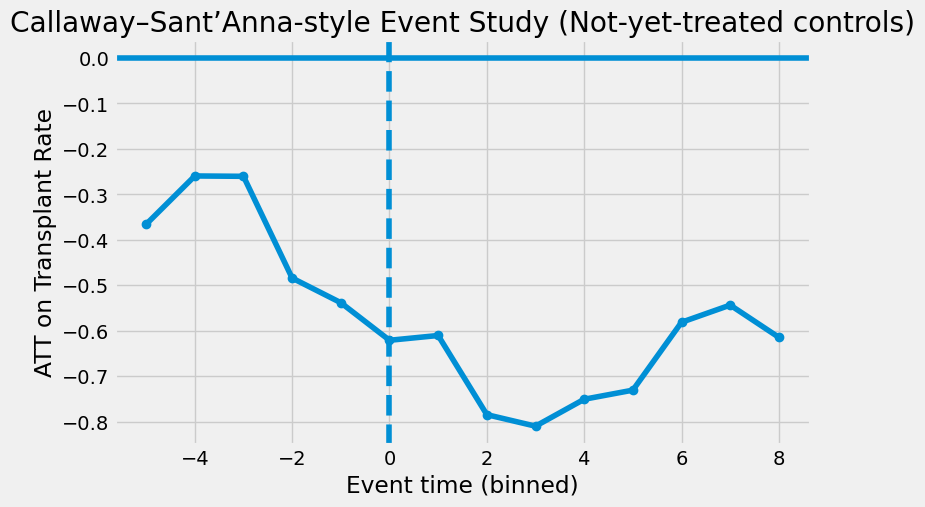

In [24]:


cleaned['State'] = cleaned['State'].astype(str).str.strip()
cleaned['Year'] = pd.to_numeric(cleaned['Year'], errors='coerce').astype('Int64')


cleaned['inst_year'] = pd.to_numeric(cleaned['inst_year'], errors='coerce')


OUTCOME = 'Transplant Rate'
if OUTCOME not in cleaned.columns:
    raise ValueError(f"Expected outcome column '{OUTCOME}' not found. Available columns: {cleaned.columns.tolist()}")

cleaned = cleaned.dropna(subset=['State', 'Year', OUTCOME]).copy()


cohorts = sorted(cleaned['inst_year'].dropna().unique())

def att_g_t(cleaned, g, t, outcome=OUTCOME):

    treated = df[(df['inst_year'] == g) & (df['Year'] == t)]
    if treated.empty:
        return None

    controls = cleaned[((cleaned['inst_year'] > t) | (cleaned['inst_year'].isna())) & (cleaned['Year'] == t)]
    if controls.empty:
        return None

    att = treated[outcome].mean() - controls[outcome].mean()

    return {
        'g': float(g),
        't': int(t),
        'event_time': int(t - g),
        'att': float(att),
        'n_treated': int(treated.shape[0]),
        'n_control': int(controls.shape[0]),
    }


results = []
for g in cohorts:
    years_g = df.loc[df['inst_year'] == g, 'Year'].unique()
    for t in years_g:
        res = att_g_t(df, g, t)
        if res is not None:
            results.append(res)

cs_df = pd.DataFrame(results)

event_study = (
    cs_df.groupby('event_time', as_index=False)
         .agg(att=('att', 'mean'),
              n=('att', 'size'),
              n_treated=('n_treated', 'sum'),
              n_control=('n_control', 'sum'))
         .sort_values('event_time')
)


def bin_event_time(x):
    if x <= -5:
        return -5
    elif x >= 8:
        return 8
    else:
        return x

event_study['event_bin'] = event_study['event_time'].apply(bin_event_time)

event_binned = (
    event_study.groupby('event_bin', as_index=False)
              .agg(att=('att', 'mean'),
                   n=('n', 'sum'),
                   n_treated=('n_treated', 'sum'),
                   n_control=('n_control', 'sum'))
              .sort_values('event_bin')
)


print("ATT(g,t) sample:")
print(cs_df.head(10))

print("\nBinned event study (C&S-style):")
print(event_binned)

plt.figure(figsize=(8,5))
plt.plot(event_binned['event_bin'], event_binned['att'], marker='o')
plt.axhline(0)
plt.axvline(0, linestyle='--')
plt.xlabel('Event time (binned)')
plt.ylabel('ATT on Transplant Rate')
plt.title('Callaway–Sant’Anna-style Event Study (Not-yet-treated controls)')
plt.show()



=== STACKED DiD (Average Effect) ===
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         3.1194      1.352      2.307      0.021       0.470       5.769
C(stack_state)[T.Alabama__g1991]                  0.4547      0.199      2.281      0.023       0.064       0.845
C(stack_state)[T.Alabama__g2000]                  0.7358      0.134      5.505      0.000       0.474       0.998
C(stack_state)[T.Alabama__g2001]                  0.7307      0.117      6.245      0.000       0.501       0.960
C(stack_state)[T.Alabama__g2002]                  0.7162      0.112      6.420      0.000       0.498       0.935
C(stack_state)[T.Alabama__g2003]                  0.7269      0.083      8.802      0.000       0.565       0.889
C(stack_state)[T.Alabama__g2004]                  

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 599, but rank is 46
  warnings.warn('covariance of constraints does not have full '


PatsyError: numbers besides '0' and '1' are only allowed with **
    Q('Transplant Rate') ~ ET_-5 + ET_-4 + ET_-3 + ET_-2 + ET_0 + ET_1 + ET_2 + ET_3 + ET_4 + ET_5 + ET_6 + ET_7 + ET_8  + Income + Q('Unemployment Rate') + C(stack_state) + C(stack_year)
                               ^

                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         1.8240      0.751      2.427      0.015       0.351       3.297
C(stack_state)[T.Alabama__g1991]                  0.1907      0.115      1.659      0.097      -0.035       0.416
C(stack_state)[T.Alabama__g2000]                  0.3128      0.078      3.985      0.000       0.159       0.467
C(stack_state)[T.Alabama__g2001]                  0.3279      0.073      4.462      0.000       0.184       0.472
C(stack_state)[T.Alabama__g2002]                  0.2917      0.070      4.186      0.000       0.155       0.428
C(stack_state)[T.Alabama__g2003]                  0.3098      0.051      6.052      0.000       0.209       0.410
C(stack_state)[T.Alabama__g2004]                  0.2644      0.065      4.060      0.00

/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 597, but rank is 46
  warnings.warn('covariance of constraints does not have full '
